In [3]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import glob

In [2]:
dataset1a = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\wc2.1_5m_bio_1.tif")
dataset1a

<open DatasetReader name='C:/Users/Dianne Kenyah/OneDrive - University of Ghana/Documents/GitHub/final_year_worldclim/worldclim/wc2.1_5m_bio/wc2.1_5m_bio_1.tif' mode='r'>

In [3]:
data1a = dataset1a.read()
data1a

array([[[-3.4000000e+38, -3.4000000e+38, -3.4000000e+38, ...,
         -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
        [-3.4000000e+38, -3.4000000e+38, -3.4000000e+38, ...,
         -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
        [-3.4000000e+38, -3.4000000e+38, -3.4000000e+38, ...,
         -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
        ...,
        [-3.0406666e+01, -3.1616875e+01, -3.1617043e+01, ...,
         -3.2788250e+01, -3.2789665e+01, -3.0401751e+01],
        [-3.4747417e+01, -3.6126293e+01, -3.6126915e+01, ...,
         -3.7479458e+01, -3.7478584e+01, -3.4753918e+01],
        [-2.6079584e+01, -2.7115126e+01, -2.7115499e+01, ...,
         -2.8144917e+01, -2.8145958e+01, -2.6102875e+01]]], dtype=float32)

In [7]:
dataset1a.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.3999999521443642e+38,
 'width': 4320,
 'height': 2160,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.08333333333333333, 0.0, -180.0,
        0.0, -0.08333333333333333, 90.0)}

In [8]:
dataset1a.shape #(height,width)

(2160, 4320)

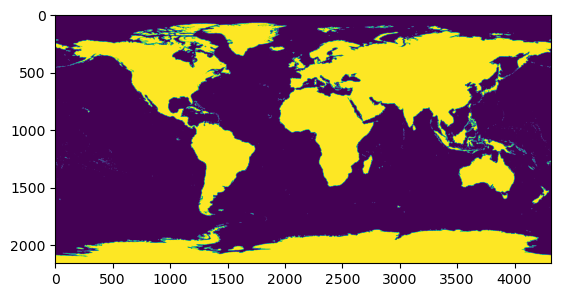

<Axes: >

In [9]:
from rasterio.plot import show
show(data1a)

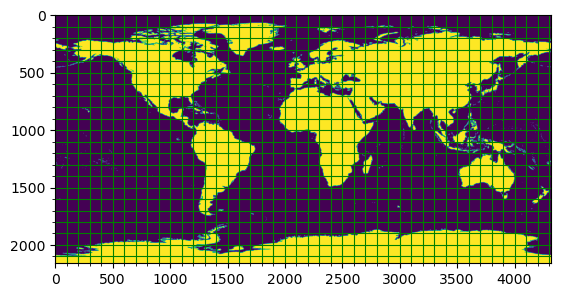

<Axes: >

In [10]:
from rasterio.plot import show
plt.minorticks_on()
plt.grid(visible = True, which='both',axis = 'both', color = 'green')
show(data1a)

In [11]:
dataset1a.transform

Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)

In [12]:
dataset1a.bounds

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)

In [13]:
dataset1a.xy(dataset1a.height // 2, dataset1a.width // 2) # finding the 
#spatial coordinates of pixel location at the center

(0.04166666666665719, -0.04166666666665719)

In [14]:
dataset1a.transform

Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)

In [15]:
dataset1a.crs

CRS.from_epsg(4326)

In [16]:
#ignore
#spatial indexing
#x = np.linspace(-180.0, 180.0, 2160)
#y = np.linspace(-90.0, 90.0, 4320)
#X, Y = np.meshgrid(x, y)
#plt.show()

In [17]:
dataset1a.indexes

(1,)

In [18]:
band1a = dataset1a.read(1)
band1a

array([[-3.4000000e+38, -3.4000000e+38, -3.4000000e+38, ...,
        -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
       [-3.4000000e+38, -3.4000000e+38, -3.4000000e+38, ...,
        -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
       [-3.4000000e+38, -3.4000000e+38, -3.4000000e+38, ...,
        -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
       ...,
       [-3.0406666e+01, -3.1616875e+01, -3.1617043e+01, ...,
        -3.2788250e+01, -3.2789665e+01, -3.0401751e+01],
       [-3.4747417e+01, -3.6126293e+01, -3.6126915e+01, ...,
        -3.7479458e+01, -3.7478584e+01, -3.4753918e+01],
       [-2.6079584e+01, -2.7115126e+01, -2.7115499e+01, ...,
        -2.8144917e+01, -2.8145958e+01, -2.6102875e+01]], dtype=float32)

In [19]:
band1a[dataset1a.height // 2, dataset1a.width // 2]

-3.4e+38

In [20]:
# finding pixel value For Accra
x, y = (dataset1a.bounds.left + 0.169494, dataset1a.bounds.top - 5.592284)
row, col = dataset1a.index(x, y)
row, col
band1a[row, col]

-3.4e+38

In [21]:
#For Hong Kong
x, y = (dataset1a.bounds.left + 114.159864, dataset1a.bounds.top - 22.352696)
row, col = dataset1a.index(x, y)
row, col
band1a[row, col]

-13.985125

In [22]:
#creating arrays for lats and longs
file_name = r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\wc2.1_5m_bio_1.tif"
with rasterio.open(file_name) as dataset1a:
    band1a = dataset1a.read(1)        
    print('band1a has shape', band1a.shape)
    height = band1a.shape[0]
    width = band1a.shape[1]
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(dataset1a.transform, rows, cols)
    longitudes = np.array(xs)
    latitudes = np.array(ys)
    print('longitudes shape', longitudes.shape)

band1a has shape (2160, 4320)
longitudes shape (2160, 4320)


In [23]:
print('latitudes shape', latitudes.shape)

latitudes shape (2160, 4320)


In [24]:
print(latitudes)

[[ 89.95833333  89.95833333  89.95833333 ...  89.95833333  89.95833333
   89.95833333]
 [ 89.875       89.875       89.875      ...  89.875       89.875
   89.875     ]
 [ 89.79166667  89.79166667  89.79166667 ...  89.79166667  89.79166667
   89.79166667]
 ...
 [-89.79166667 -89.79166667 -89.79166667 ... -89.79166667 -89.79166667
  -89.79166667]
 [-89.875      -89.875      -89.875      ... -89.875      -89.875
  -89.875     ]
 [-89.95833333 -89.95833333 -89.95833333 ... -89.95833333 -89.95833333
  -89.95833333]]


In [25]:
print(longitudes)

[[-179.95833333 -179.875      -179.79166667 ...  179.79166667
   179.875       179.95833333]
 [-179.95833333 -179.875      -179.79166667 ...  179.79166667
   179.875       179.95833333]
 [-179.95833333 -179.875      -179.79166667 ...  179.79166667
   179.875       179.95833333]
 ...
 [-179.95833333 -179.875      -179.79166667 ...  179.79166667
   179.875       179.95833333]
 [-179.95833333 -179.875      -179.79166667 ...  179.79166667
   179.875       179.95833333]
 [-179.95833333 -179.875      -179.79166667 ...  179.79166667
   179.875       179.95833333]]


checking that a nodata location in one image is also valid in another image of different bioclimatic variable

In [36]:
dataset2a = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_01.tif")
dataset2a

<open DatasetReader name='C:/Users/Dianne Kenyah/OneDrive - University of Ghana/Documents/GitHub/final_year_worldclim/worldclim/wc2.1_5m_prec/wc2.1_5m_prec_01.tif' mode='r'>

In [38]:
data2a = dataset2a.read()
data2a

array([[[-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        ...,
        [     0,      0,      0, ...,      0,      0,      0],
        [     0,      0,      0, ...,      0,      0,      0],
        [     0,      0,      0, ...,      0,      0,      0]]],
      dtype=int16)

In [28]:
dataset2a.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 4320,
 'height': 2160,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.08333333333333333, 0.0, -180.0,
        0.0, -0.08333333333333333, 90.0)}

In [29]:
data2a = data2a.squeeze()
data2a.shape

(2160, 4320)

In [30]:
import matplotlib.pyplot as plt

In [31]:
a = np.arange(12).reshape(4,3)

In [32]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [33]:
a %2 ==0 

array([[ True, False,  True],
       [False,  True, False],
       [ True, False,  True],
       [False,  True, False]])

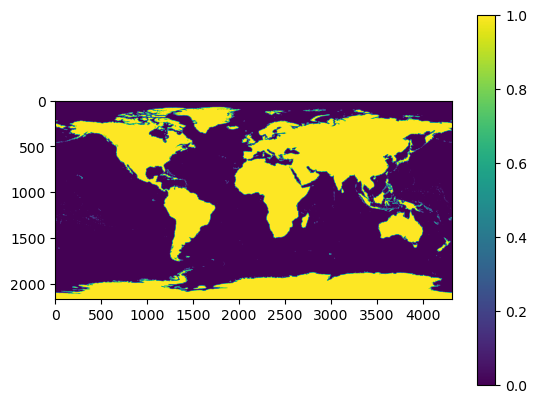

In [34]:
plt.imshow(data2a!=-32768.0)
plt.colorbar()

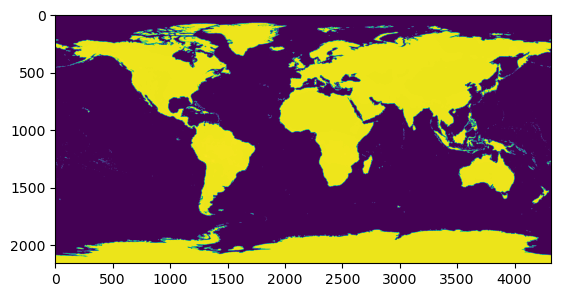

<Axes: >

In [35]:
show(data2a)

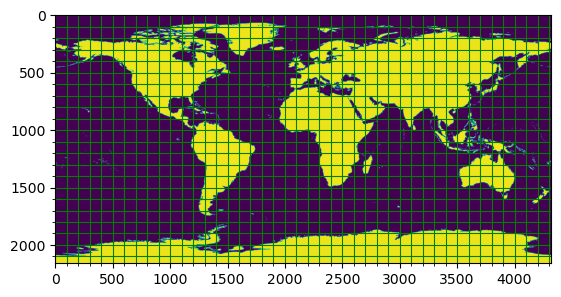

<Axes: >

In [36]:
plt.minorticks_on()
plt.grid(visible = True, which='both',axis = 'both', color = 'green')
show(data2a)

## 12/12/2023 - finding nodata values and checking their validity

In [37]:
# 1. Open each file
# 2. 

In [4]:
#Opening bio dataset - 5m - dataset 1
dataset1a = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\wc2.1_5m_bio_1.tif")
dataset1b = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\wc2.1_5m_bio_2.tif")
dataset1c = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\wc2.1_5m_bio_3.tif")
dataset1d = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\wc2.1_5m_bio_4.tif")
dataset1e = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\wc2.1_5m_bio_5.tif")
dataset1f = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\wc2.1_5m_bio_6.tif")
dataset1g = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\wc2.1_5m_bio_7.tif")
dataset1h = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\wc2.1_5m_bio_8.tif")
dataset1i = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\wc2.1_5m_bio_9.tif")
dataset1j = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\wc2.1_5m_bio_10.tif")
dataset1k = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\wc2.1_5m_bio_11.tif")
dataset1l = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\wc2.1_5m_bio_12.tif")
dataset1m = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\wc2.1_5m_bio_13.tif")
dataset1n = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\wc2.1_5m_bio_14.tif")
dataset1o = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\wc2.1_5m_bio_15.tif")
dataset1p = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\wc2.1_5m_bio_16.tif")
dataset1q = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\wc2.1_5m_bio_17.tif")
dataset1r = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\wc2.1_5m_bio_18.tif")
dataset1s = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\wc2.1_5m_bio_19.tif")

In [39]:
dataset1b.nodata

-3.3999999521443642e+38

In [40]:
dataset1a.nodata == dataset1b.nodata

True

In [41]:
dataset1_nodata = [dataset1a.nodata, dataset1b.nodata, dataset1c.nodata, dataset1d.nodata, 
                   dataset1e.nodata, dataset1f.nodata, dataset1g.nodata, dataset1h.nodata, 
                   dataset1i.nodata, dataset1j.nodata, dataset1k.nodata, dataset1l.nodata,
                   dataset1m.nodata, dataset1n.nodata, dataset1o.nodata, dataset1p.nodata, 
                   dataset1q.nodata, dataset1r.nodata, dataset1s.nodata]

In [42]:
dataset1_nodata

[-3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38]

In [43]:
dataset1a.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.3999999521443642e+38,
 'width': 4320,
 'height': 2160,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.08333333333333333, 0.0, -180.0,
        0.0, -0.08333333333333333, 90.0)}

In [5]:
#Opening prec dataset - 5m - dataset 2
dataset2a = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_01.tif")
dataset2b = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_02.tif")
dataset2c = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_03.tif")
dataset2d = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_04.tif")
dataset2e = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_05.tif")
dataset2f = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_06.tif")
dataset2g = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_07.tif")
dataset2h = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_08.tif")
dataset2i = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_09.tif")
dataset2j = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_10.tif")
dataset2k = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_11.tif")
dataset2l = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_12.tif")

In [45]:
dataset2_nodata = [dataset2a.nodata, dataset2b.nodata, dataset2c.nodata, dataset2d.nodata, 
                   dataset2e.nodata, dataset2f.nodata, dataset2g.nodata, dataset2h.nodata, 
                   dataset2i.nodata, dataset2j.nodata, dataset2k.nodata, dataset2l.nodata]

dataset2_nodata

[-32768.0,
 -32768.0,
 -32768.0,
 -32768.0,
 -32768.0,
 -32768.0,
 -32768.0,
 -32768.0,
 -32768.0,
 -32768.0,
 -32768.0,
 -32768.0]

In [46]:
dataset2a.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 4320,
 'height': 2160,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.08333333333333333, 0.0, -180.0,
        0.0, -0.08333333333333333, 90.0)}

In [8]:
#Opening tavg dataset - 5m - dataset 3
dataset3a = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_01.tif")
dataset3b = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_02.tif")
dataset3c = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_03.tif")
dataset3d = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_04.tif")
dataset3e = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_05.tif")
dataset3f = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_06.tif")
dataset3g = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_07.tif")
dataset3h = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_08.tif")
dataset3i = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_09.tif")
dataset3j = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_10.tif")
dataset3k = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_11.tif")
dataset3l = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_12.tif")

In [9]:
dataset3_nodata = [dataset3a.nodata, dataset3b.nodata, dataset3c.nodata, dataset3d.nodata, 
                   dataset3e.nodata, dataset3f.nodata, dataset3g.nodata, dataset3h.nodata, 
                   dataset3i.nodata, dataset3j.nodata, dataset3k.nodata, dataset3l.nodata]

dataset3_nodata

[-3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38]

In [10]:
#Opening tmax dataset - 5m - dataset 4
dataset4a = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_01.tif")
dataset4b = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_02.tif")
dataset4c = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_03.tif")
dataset4d = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_04.tif")
dataset4e = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_05.tif")
dataset4f = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_06.tif")
dataset4g = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_07.tif")
dataset4h = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_08.tif")
dataset4i = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_09.tif")
dataset4j = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_10.tif")
dataset4k = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_11.tif")
dataset4l = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_12.tif")


In [50]:
dataset4_nodata = [dataset4a.nodata, dataset4b.nodata, dataset4c.nodata, dataset4d.nodata, 
                   dataset4e.nodata, dataset4f.nodata, dataset4g.nodata, dataset4h.nodata, 
                   dataset4i.nodata, dataset4j.nodata, dataset4k.nodata, dataset4l.nodata]

dataset4_nodata

[-3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38]

In [51]:
len(dataset4_nodata)

12

In [11]:
#Opening tmin dataset - 5m - dataset 5
dataset5a = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_01.tif")
dataset5b = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_02.tif")
dataset5c = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_03.tif")
dataset5d = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_04.tif")
dataset5e = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_05.tif")
dataset5f = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_06.tif")
dataset5g = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_07.tif")
dataset5h = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_08.tif")
dataset5i = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_09.tif")
dataset5j = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_10.tif")
dataset5k = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_11.tif")
dataset5l = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_12.tif")

In [53]:
dataset5_nodata = [dataset5a.nodata, dataset5b.nodata, dataset5c.nodata, dataset5d.nodata, 
                   dataset5e.nodata, dataset5f.nodata, dataset5g.nodata, dataset5h.nodata, 
                   dataset5i.nodata, dataset5j.nodata, dataset5k.nodata, dataset5l.nodata]

dataset5_nodata

[-3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38,
 -3.3999999521443642e+38]

?: nodata values for tmin = tavg = bio = tmax != prec.
Need to check why 

In [54]:
dataset1a.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.3999999521443642e+38,
 'width': 4320,
 'height': 2160,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.08333333333333333, 0.0, -180.0,
        0.0, -0.08333333333333333, 90.0)}

In [55]:
dataset2a.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 4320,
 'height': 2160,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.08333333333333333, 0.0, -180.0,
        0.0, -0.08333333333333333, 90.0)}

In [56]:
dataset3e.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.3999999521443642e+38,
 'width': 4320,
 'height': 2160,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.08333333333333333, 0.0, -180.0,
        0.0, -0.08333333333333333, 90.0)}

In [57]:
dataset4b.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.3999999521443642e+38,
 'width': 4320,
 'height': 2160,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.08333333333333333, 0.0, -180.0,
        0.0, -0.08333333333333333, 90.0)}

In [58]:
dataset5f.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.3999999521443642e+38,
 'width': 4320,
 'height': 2160,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.08333333333333333, 0.0, -180.0,
        0.0, -0.08333333333333333, 90.0)}

1. Will we have to merge datasets of the same bioclimatic variable?
2. Study about each meta parameter
3. Study meaning of bio, prec, tavg, tmin, tmax
4. Study definition of band

In [59]:
# Finding spatial coordinate for dataset2 (prec) nodata value = -32768.0

In [60]:
# Observations
# 1. meta parameters
# a. driver: same for all datasets = GTiff
# b. dtype: i. bio = tmin = tmax = tavg = float32, prec = int16
# c. nodata: i. bio = tmin = tmax = tavg = -3.3999999521443642e+38, prec = -32768.0
# d. width: same for all datasets = 4320
# e. height: same for all datasets = 2160
# f. count: same for all datasets = 1
# g. crs: same for all datasets = CRS.from_epsg(4326)
# h. transform: same for all datasets = Affine(0.08333333333333333, 0.0, -180.0,
#       0.0, -0.08333333333333333, 90.0)}

In [61]:
dataset1g.meta == dataset3b.meta == dataset4h.meta == dataset5e.meta
# This is true for all files under bio, tmin, tmax, tavg

True

In [62]:
dataset1g.meta == dataset3b.meta == dataset4h.meta == dataset5e.meta == dataset2g.meta
# this is because of nodata values

False

In [63]:
#Checking
dataset1g.nodata == dataset3b.nodata == dataset4h.nodata == dataset5e.nodata == dataset2g.nodata

False

In [64]:
dataset5a.meta == dataset5b.meta == dataset5c.meta == dataset5d.meta == dataset5e.meta == dataset5f.meta == dataset5g.meta == dataset5h.meta == dataset5i.meta == dataset5j.meta == dataset5k.meta == dataset5l.meta

True

In [65]:
dataset4a.meta == dataset4b.meta == dataset4c.meta == dataset4d.meta == dataset4e.meta == dataset4f.meta == dataset4g.meta == dataset4h.meta == dataset4i.meta == dataset4j.meta == dataset4k.meta == dataset4l.meta

True

In [66]:
dataset3a.meta == dataset3b.meta == dataset3c.meta == dataset3d.meta == dataset3e.meta == dataset3f.meta == dataset3g.meta == dataset3h.meta == dataset3i.meta == dataset3j.meta == dataset3k.meta == dataset3l.meta

True

In [67]:
dataset2a.meta == dataset2b.meta == dataset2c.meta == dataset2d.meta == dataset2e.meta == dataset2f.meta == dataset2g.meta == dataset2h.meta == dataset2i.meta == dataset2j.meta == dataset2k.meta == dataset2l.meta

True

In [68]:
dataset1a.meta == dataset1b.meta == dataset1c.meta == dataset1d.meta == dataset1e.meta == dataset1f.meta == dataset1g.meta == dataset1h.meta == dataset1i.meta == dataset1j.meta == dataset1k.meta == dataset1l.meta

True

In [69]:
# Since metadata is the same for each file under each respective variable folder, I can use random files from needed folder

In [70]:
dataset2a.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 4320,
 'height': 2160,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.08333333333333333, 0.0, -180.0,
        0.0, -0.08333333333333333, 90.0)}

In [71]:
dataset2a.indexes

(1,)

In [72]:
# Checking for spatial coordinates
band2a = dataset2a.read(1)
band2a

array([[-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       ...,
       [     0,      0,      0, ...,      0,      0,      0],
       [     0,      0,      0, ...,      0,      0,      0],
       [     0,      0,      0, ...,      0,      0,      0]], dtype=int16)

In [73]:
dataset2a.read()

array([[[-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        ...,
        [     0,      0,      0, ...,      0,      0,      0],
        [     0,      0,      0, ...,      0,      0,      0],
        [     0,      0,      0, ...,      0,      0,      0]]],
      dtype=int16)

In [74]:
len(band2a)

2160

In [75]:
dataset2a.bounds

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)

In [76]:
band2a[dataset1a.height // 2, dataset1a.width // 2]

-32768

In [77]:
x, y = (dataset2a.bounds.left + 0.04166666666665719, dataset2a.bounds.top -0.04166666666665719)
row, col = dataset2a.index(x, y)
row, col

(0, 0)

In [78]:
x, y = (dataset2a.bounds.left + 0.04166666666665719, dataset2a.bounds.top -0.04166666666665719)
row, col = dataset2a.index(x, y)
row, col
band2a[row, col]

-32768

In [79]:
dataset2a.xy(dataset2a.height // 2, dataset2a.width // 2) 


(0.04166666666665719, -0.04166666666665719)

In [80]:
dataset1a.xy(dataset1a.height // 2, dataset1a.width // 2) == dataset2a.xy(dataset2a.height // 2, dataset2a.width // 2) 



True

In [81]:
dataset1a.xy(dataset1a.height // 2, dataset1a.width // 2) 
# finding the spatial coordinates of pixel location at the center

(0.04166666666665719, -0.04166666666665719)

In [82]:
A = np.array([[True,False,False,False],[True,True,False,True],[True,False,False,True],[False,True,False,False]])
A

array([[ True, False, False, False],
       [ True,  True, False,  True],
       [ True, False, False,  True],
       [False,  True, False, False]])

In [83]:
B = np.array([[False,False,False,True],[True,True,False,False],[False,True,True,False],[True,True,True,True]])
B

array([[False, False, False,  True],
       [ True,  True, False, False],
       [False,  True,  True, False],
       [ True,  True,  True,  True]])

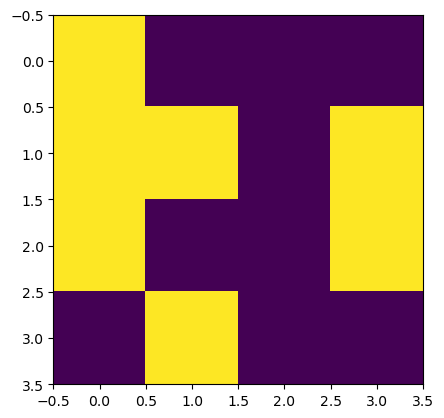

In [84]:
plt.imshow(A)

In [85]:
C = (A * B)
C

array([[False, False, False, False],
       [ True,  True, False, False],
       [False, False, False, False],
       [False,  True, False, False]])

In [86]:
A

array([[ True, False, False, False],
       [ True,  True, False,  True],
       [ True, False, False,  True],
       [False,  True, False, False]])

In [87]:
B

array([[False, False, False,  True],
       [ True,  True, False, False],
       [False,  True,  True, False],
       [ True,  True,  True,  True]])

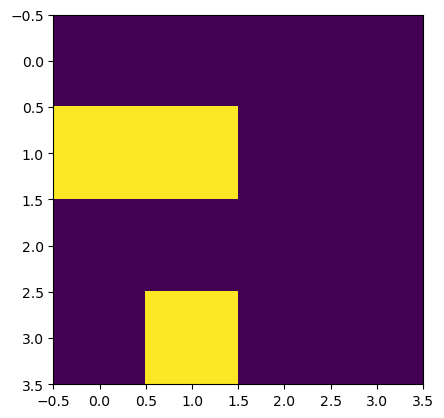

In [88]:
plt.imshow(C)

In [89]:
data1a

array([[[-3.4000000e+38, -3.4000000e+38, -3.4000000e+38, ...,
         -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
        [-3.4000000e+38, -3.4000000e+38, -3.4000000e+38, ...,
         -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
        [-3.4000000e+38, -3.4000000e+38, -3.4000000e+38, ...,
         -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
        ...,
        [-3.0406666e+01, -3.1616875e+01, -3.1617043e+01, ...,
         -3.2788250e+01, -3.2789665e+01, -3.0401751e+01],
        [-3.4747417e+01, -3.6126293e+01, -3.6126915e+01, ...,
         -3.7479458e+01, -3.7478584e+01, -3.4753918e+01],
        [-2.6079584e+01, -2.7115126e+01, -2.7115499e+01, ...,
         -2.8144917e+01, -2.8145958e+01, -2.6102875e+01]]], dtype=float32)

In [90]:
data1a.shape

(1, 2160, 4320)

In [91]:
data1a.squeeze().shape

(2160, 4320)

In [92]:
dataset1a.meta


{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.3999999521443642e+38,
 'width': 4320,
 'height': 2160,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.08333333333333333, 0.0, -180.0,
        0.0, -0.08333333333333333, 90.0)}

In [93]:
A1 = (data1a.squeeze()) != -3.3999999521443642e+38
A1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [94]:
data1b = dataset1b.read()
data1b

array([[[-3.4000000e+38, -3.4000000e+38, -3.4000000e+38, ...,
         -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
        [-3.4000000e+38, -3.4000000e+38, -3.4000000e+38, ...,
         -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
        [-3.4000000e+38, -3.4000000e+38, -3.4000000e+38, ...,
         -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
        ...,
        [ 6.5209994e+00,  6.7277498e+00,  6.7290835e+00, ...,
          6.1038337e+00,  6.1096673e+00,  5.7189999e+00],
        [ 7.3009996e+00,  7.5375829e+00,  7.5388327e+00, ...,
          6.8309164e+00,  6.8393335e+00,  6.3915005e+00],
        [ 5.7386670e+00,  5.9147501e+00,  5.9140000e+00, ...,
          5.3689995e+00,  5.3715835e+00,  5.0315824e+00]]], dtype=float32)

In [95]:
data1b.shape

(1, 2160, 4320)

In [96]:
data1b.squeeze().shape

(2160, 4320)

In [97]:
dataset1b.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.3999999521443642e+38,
 'width': 4320,
 'height': 2160,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.08333333333333333, 0.0, -180.0,
        0.0, -0.08333333333333333, 90.0)}

In [98]:
B1 = (data1b.squeeze()) != -3.3999999521443642e+38
B1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [99]:
A1 * B1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [100]:
data1c = dataset1c.read()
data1c

array([[[-3.4000000e+38, -3.4000000e+38, -3.4000000e+38, ...,
         -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
        [-3.4000000e+38, -3.4000000e+38, -3.4000000e+38, ...,
         -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
        [-3.4000000e+38, -3.4000000e+38, -3.4000000e+38, ...,
         -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
        ...,
        [ 2.2238514e+01,  2.2767344e+01,  2.2771856e+01, ...,
          2.2453773e+01,  2.2464491e+01,  2.1306957e+01],
        [ 2.1869759e+01,  2.2406609e+01,  2.2410324e+01, ...,
          2.2070810e+01,  2.2097294e+01,  2.0919388e+01],
        [ 2.2657402e+01,  2.3176918e+01,  2.3175797e+01, ...,
          2.2827381e+01,  2.2828657e+01,  2.1676645e+01]]], dtype=float32)

In [101]:
dataset1c.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.3999999521443642e+38,
 'width': 4320,
 'height': 2160,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.08333333333333333, 0.0, -180.0,
        0.0, -0.08333333333333333, 90.0)}

In [102]:
C1 = (data1c.squeeze()) != -3.3999999521443642e+38
C1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [12]:
#Opening tmin dataset - 5m - dataset 5
dataset5a = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_01.tif")
dataset5b = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_02.tif")
dataset5c = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_03.tif")
dataset5d = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_04.tif")
dataset5e = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_05.tif")
dataset5f = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_06.tif")
dataset5g = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_07.tif")
dataset5h = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_08.tif")
dataset5i = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_09.tif")
dataset5j = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_10.tif")
dataset5k = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_11.tif")
dataset5l = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\wc2.1_5m_tmin_12.tif")

In [29]:
data5a = dataset5a.read()
data5a

array([[[-3.4000000e+38, -3.4000000e+38, -3.4000000e+38, ...,
         -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
        [-3.4000000e+38, -3.4000000e+38, -3.4000000e+38, ...,
         -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
        [-3.4000000e+38, -3.4000000e+38, -3.4000000e+38, ...,
         -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
        ...,
        [-1.9660000e+01, -2.1010000e+01, -2.1010000e+01, ...,
         -2.2410000e+01, -2.2410000e+01, -1.9708000e+01],
        [-2.2403999e+01, -2.3939999e+01, -2.3939999e+01, ...,
         -2.5539999e+01, -2.5539999e+01, -2.2451000e+01],
        [-1.6927999e+01, -1.8080000e+01, -1.8080000e+01, ...,
         -1.9279999e+01, -1.9279999e+01, -1.6963999e+01]]], dtype=float32)

In [105]:
dataset5a.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.3999999521443642e+38,
 'width': 4320,
 'height': 2160,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.08333333333333333, 0.0, -180.0,
        0.0, -0.08333333333333333, 90.0)}

In [106]:
data5a.squeeze()

array([[-3.4000000e+38, -3.4000000e+38, -3.4000000e+38, ...,
        -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
       [-3.4000000e+38, -3.4000000e+38, -3.4000000e+38, ...,
        -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
       [-3.4000000e+38, -3.4000000e+38, -3.4000000e+38, ...,
        -3.4000000e+38, -3.4000000e+38, -3.4000000e+38],
       ...,
       [-1.9660000e+01, -2.1010000e+01, -2.1010000e+01, ...,
        -2.2410000e+01, -2.2410000e+01, -1.9708000e+01],
       [-2.2403999e+01, -2.3939999e+01, -2.3939999e+01, ...,
        -2.5539999e+01, -2.5539999e+01, -2.2451000e+01],
       [-1.6927999e+01, -1.8080000e+01, -1.8080000e+01, ...,
        -1.9279999e+01, -1.9279999e+01, -1.6963999e+01]], dtype=float32)

In [107]:
data5a.squeeze() != -3.3999999521443642e+38

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

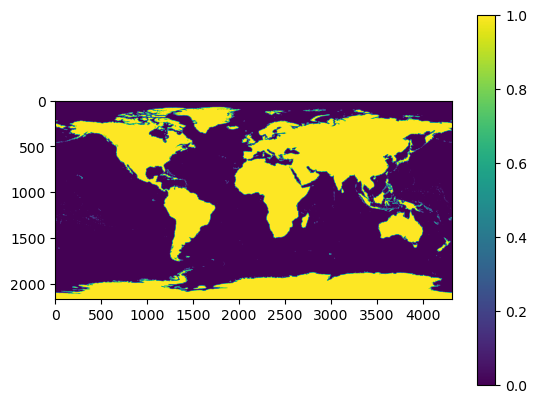

In [108]:
plt.imshow(data5a.squeeze() != -3.3999999521443642e+38)
plt.colorbar()

In [13]:
data5a = dataset5a.read()
data5b = dataset5b.read()
data5c = dataset5c.read()
data5d = dataset5d.read()
data5e = dataset5e.read()
data5f = dataset5f.read()
data5g = dataset5g.read()
data5h = dataset5h.read()
data5i = dataset5i.read()
data5j = dataset5j.read()
data5k = dataset5k.read()
data5l = dataset5l.read()

In [14]:
A5 = data5a.squeeze() != dataset5a.nodata
B5 = data5b.squeeze() != dataset5b.nodata
C5 = data5c.squeeze() != dataset5c.nodata
D5 = data5d.squeeze() != dataset5d.nodata
E5 = data5e.squeeze() != dataset5e.nodata
F5 = data5f.squeeze() != dataset5f.nodata
G5 = data5g.squeeze() != dataset5e.nodata
H5 = data5h.squeeze() != dataset5e.nodata
I5 = data5i.squeeze() != dataset5e.nodata
J5 = data5j.squeeze() != dataset5e.nodata
K5 = data5k.squeeze() != dataset5e.nodata
L5 = data5l.squeeze() != dataset5e.nodata

In [111]:
X5 = [A5,B5,C5,D5,E5, F5,G5,H5,I5,J5,K5,L5]

i = []
j = []
for i in X5:
    for j in X5:
        i * j
        print(i * j)
    i =+ 1

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  

In [113]:
X5 = [A5,B5,C5,D5,E5, F5,G5,H5,I5,J5,K5,L5]

i = []
j = []
for i in X5:
    for j in X5:
        i * j
        print(i * j)
    i += 1

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('int32') to dtype('bool') with casting rule 'same_kind'

In [15]:
#Opening tmax dataset - 5m - dataset 4
dataset4a = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_01.tif")
dataset4b = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_02.tif")
dataset4c = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_03.tif")
dataset4d = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_04.tif")
dataset4e = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_05.tif")
dataset4f = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_06.tif")
dataset4g = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_07.tif")
dataset4h = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_08.tif")
dataset4i = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_09.tif")
dataset4j = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_10.tif")
dataset4k = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_11.tif")
dataset4l = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\wc2.1_5m_tmax_12.tif")


In [16]:
data4a = dataset4a.read()
data4b = dataset4b.read()
data4c = dataset4c.read()
data4d = dataset4d.read()
data4e = dataset4e.read()
data4f = dataset4f.read()
data4g = dataset4g.read()
data4h = dataset4h.read()
data4i = dataset4i.read()
data4j = dataset4j.read()
data4k = dataset4k.read()
data4l = dataset4l.read()

In [17]:
A4 = data4a.squeeze() != dataset4a.nodata
B4 = data4b.squeeze() != dataset4a.nodata
C4 = data4c.squeeze() != dataset4a.nodata
D4 = data4d.squeeze() != dataset4a.nodata
E4 = data4e.squeeze() != dataset4a.nodata
F4 = data4f.squeeze() != dataset4a.nodata
G4 = data4g.squeeze() != dataset4a.nodata
H4 = data4h.squeeze() != dataset4a.nodata
I4 = data4i.squeeze() != dataset4a.nodata
J4 = data4j.squeeze() != dataset4a.nodata
K4 = data4k.squeeze() != dataset4a.nodata
L4 = data4l.squeeze() != dataset4a.nodata


In [ ]:
X4 = [A4,B4,C4,D4,E4, F4,G4,H4,I4,J4,K4,L4]

i = []
j = []
for i in X4:
    for j in X4:
        i * j
        print(i * j)
    i =+ 1

In [18]:
#Opening tavg dataset - 5m - dataset 3
dataset3a = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_01.tif")
dataset3b = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_02.tif")
dataset3c = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_03.tif")
dataset3d = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_04.tif")
dataset3e = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_05.tif")
dataset3f = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_06.tif")
dataset3g = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_07.tif")
dataset3h = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_08.tif")
dataset3i = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_09.tif")
dataset3j = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_10.tif")
dataset3k = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_11.tif")
dataset3l = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\wc2.1_5m_tavg_12.tif")

In [19]:
data3a = dataset3a.read()
data3b = dataset3b.read()
data3c = dataset3c.read()
data3d = dataset3d.read()
data3e = dataset3e.read()
data3f = dataset3f.read()
data3g = dataset3g.read()
data3h = dataset3h.read()
data3i = dataset3i.read()
data3j = dataset3j.read()
data3k = dataset3k.read()
data3l = dataset3l.read()

In [20]:
A3 = data3a.squeeze() != dataset3a.nodata
B3 = data3b.squeeze() != dataset3b.nodata
C3 = data3c.squeeze() != dataset3c.nodata
D3 = data3d.squeeze() != dataset3d.nodata
E3 = data3e.squeeze() != dataset3e.nodata
F3 = data3f.squeeze() != dataset3f.nodata
G3 = data3g.squeeze() != dataset3e.nodata
H3 = data3h.squeeze() != dataset3e.nodata
I3 = data3i.squeeze() != dataset3e.nodata
J3 = data3j.squeeze() != dataset3e.nodata
K3 = data3k.squeeze() != dataset3e.nodata
L3 = data3l.squeeze() != dataset3e.nodata

In [ ]:
X3 = [A3,B3,C3,D3,E3, F3,G3,H3,I3,J3,K3,L3]

i = []
j = [] 
for i in X3:
    for j in X3:
        i * j
        print(i * j)
    i =+ 1

In [21]:
#Opening prec dataset - 5m - dataset 2
dataset2a = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_01.tif")
dataset2b = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_02.tif")
dataset2c = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_03.tif")
dataset2d = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_04.tif")
dataset2e = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_05.tif")
dataset2f = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_06.tif")
dataset2g = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_07.tif")
dataset2h = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_08.tif")
dataset2i = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_09.tif")
dataset2j = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_10.tif")
dataset2k = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_11.tif")
dataset2l = rasterio.open(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\wc2.1_5m_prec_12.tif")

In [22]:
data2a = dataset2a.read()
data2b = dataset2b.read()
data2c = dataset2c.read()
data2d = dataset2d.read()
data2e = dataset2e.read()
data2f = dataset2f.read()
data2g = dataset2g.read()
data2h = dataset2h.read()
data2i = dataset2i.read()
data2j = dataset2j.read()
data2k = dataset2k.read()
data2l = dataset2l.read()

In [ ]:
data2a

In [ ]:
data2b

In [23]:
A2 = data2a.squeeze() != dataset2a.nodata
B2 = data2b.squeeze() != dataset2b.nodata
C2 = data2c.squeeze() != dataset2c.nodata
D2 = data2d.squeeze() != dataset2d.nodata
E2 = data2e.squeeze() != dataset2e.nodata
F2 = data2f.squeeze() != dataset2f.nodata
G2 = data2g.squeeze() != dataset2g.nodata
H2 = data2h.squeeze() != dataset2h.nodata
I2 = data2i.squeeze() != dataset2i.nodata
J2 = data2j.squeeze() != dataset2j.nodata
K2 = data2k.squeeze() != dataset2k.nodata
L2 = data2l.squeeze() != dataset2l.nodata

In [24]:
myfiles = glob.glob(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\*.tif")
res = []
for i in myfiles:
    curr_file = rasterio.open(i)
    data_bin = curr_file.read()
    data_bin = data_bin.squeeze() != curr_file.nodata
    res.append(data_bin)
data = np.dstack(res)

In [25]:
data.shape

(2160, 4320, 12)

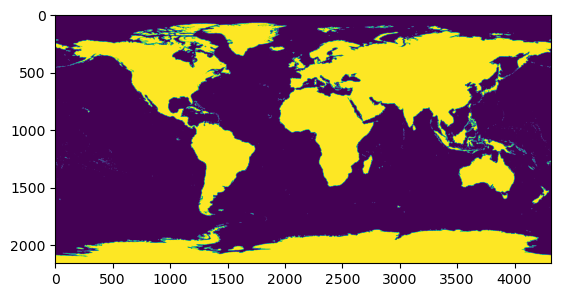

In [26]:
plt.imshow(data[:,:,2])

In [27]:
data1a = dataset1a.read()
data1b = dataset1b.read()
data1c = dataset1c.read()
data1d = dataset1d.read()
data1e = dataset1e.read()
data1f = dataset1f.read()
data1g = dataset1g.read()
data1h = dataset1h.read()
data1i = dataset1i.read()
data1j = dataset1j.read()
data1k = dataset1k.read()
data1l = dataset1l.read()
data1m = dataset1m.read()
data1n = dataset1n.read()
data1o = dataset1o.read()
data1p = dataset1p.read()
data1q = dataset1q.read()
data1r = dataset1r.read()
data1s = dataset1s.read()

In [28]:
A1 = data1a.squeeze() != dataset1a.nodata
B1 = data1b.squeeze() != dataset1b.nodata
C1 = data1c.squeeze() != dataset1c.nodata
D1 = data1d.squeeze() != dataset1d.nodata
E1 = data1e.squeeze() != dataset1e.nodata
F1 = data1f.squeeze() != dataset1f.nodata
G1 = data1g.squeeze() != dataset1g.nodata
H1 = data1h.squeeze() != dataset1h.nodata
I1 = data1i.squeeze() != dataset1i.nodata
J1 = data1j.squeeze() != dataset1j.nodata
K1 = data1k.squeeze() != dataset1k.nodata
L1 = data1l.squeeze() != dataset1l.nodata
M1 = data1m.squeeze() != dataset1m.nodata
N1 = data1n.squeeze() != dataset1n.nodata
O1 = data1o.squeeze() != dataset1o.nodata
P1 = data1p.squeeze() != dataset1p.nodata
Q1 = data1q.squeeze() != dataset1q.nodata
R1 = data1r.squeeze() != dataset1r.nodata
S1 = data1s.squeeze() != dataset1s.nodata

In [ ]:
dataset1a.nodata

In [ ]:
X = [
    A5,B5,C5,D5,E5, F5,G5,H5,I5,J5,K5,L5,
    A4,B4,C4,D4,E4, F4,G4,H4,I4,J4,K4,L4,
    A3,B3,C3,D3,E3, F3,G3,H3,I3,J3,K3,L3,
    A2,B2,C2,D2,E2, F2,G2,H2,I2,J2,K2,L2,
    A1,B1,C1,D1,E1, F1,G1,H1,I1,J1,K1,L1,M1,N1,O1,R1,S1
    ]

In [ ]:

i = []
j = []
for i in X:
    for j in X:
        i * j
        print(i * j)
    i =+ 1

In [143]:
A1*B1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

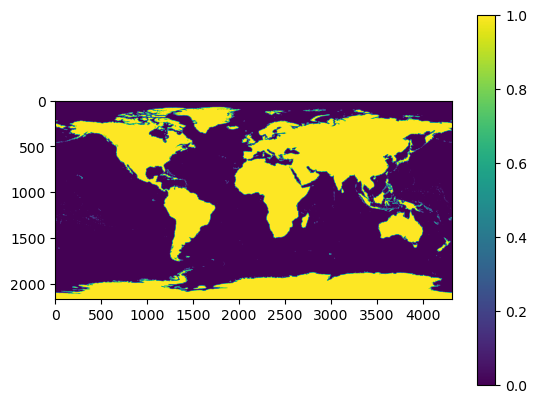

In [144]:
plt.imshow((A1*B1))
plt.colorbar()

In [145]:
A1+B5

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

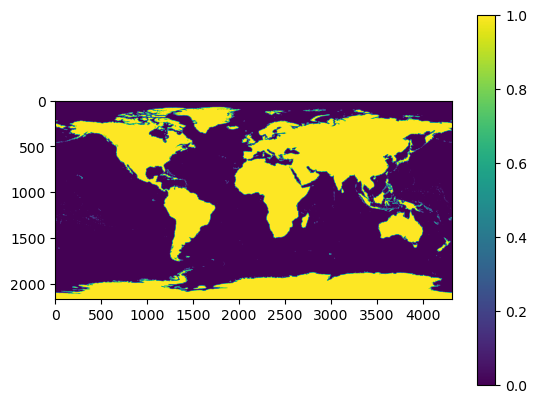

In [146]:
plt.imshow((A1+B5))
plt.colorbar()

In [147]:
(A1*B1) & (A1+B1)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

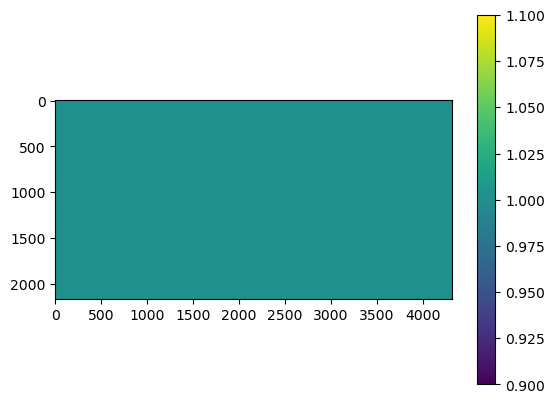

In [148]:
plt.imshow((A1*B1) == (A1+B1))
plt.colorbar()

In [149]:
A1*B1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [150]:
A1+B1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [151]:
np.all((A1*B1) == (A1+B1))

True

In [152]:
A1.shape

(2160, 4320)

In [153]:
# i = []
# j = []
# for i in X:
#     for j in X:
#         ((i*j) & (i+j))
#         print((i*j) & (i+j))
#     i =+ 1

In [154]:
# plt.imshow((A1*A2) & (A1+A2))
# plt.colorbar()

In [155]:
# plt.imshow((A1*C1) & (A1+C1))
# plt.colorbar()

In [156]:
# X = [
#     A5,B5,C5,D5,E5, F5,G5,H5,I5,J5,K5,L5,
#     A4,B4,C4,D4,E4, F4,G4,H4,I4,J4,K4,L4,
#     A3,B3,C3,D3,E3, F3,G3,H3,I3,J3,K3,L3,
#     A2,B2,C2,D2,E2, F2,G2,H2,I2,J2,K2,L2,
#     A1,B1,C1,D1,E1, F1,G1,H1,I1,J1,K1,L1,M1,N1,O1,R1,S1
#     ]

In [157]:
# plt.imshow((S1*A2) == (S1+A2))
# plt.colorbar()

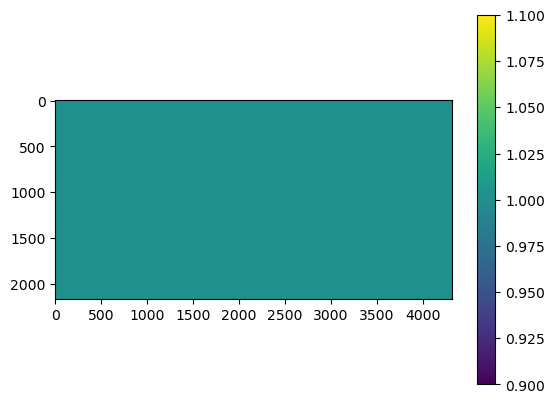

In [158]:
plt.imshow((A1 * L5) == (A1+L5))
plt.colorbar()

In [29]:
myfiles_1 = glob.glob(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_bio\*.tif")
res_1 = []
for i in myfiles_1:
    curr_file_1 = rasterio.open(i)
    data_bin_1 = curr_file_1.read()
    data_bin_1 = data_bin_1.squeeze() != curr_file_1.nodata
    res_1.append(data_bin_1)
bio_data = np.dstack(res_1)

In [30]:
myfiles_2 = glob.glob(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_prec\*.tif")
res_2 = []
for i in myfiles_2:
    curr_file_2 = rasterio.open(i)
    data_bin_2 = curr_file_2.read()
    data_bin_2 = data_bin_2.squeeze() != curr_file_2.nodata
    res_2.append(data_bin_2)
prec_data = np.dstack(res_2)

In [31]:
myfiles_3 = glob.glob(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tavg\*.tif")
res_3 = []
for i in myfiles_3:
    curr_file_3 = rasterio.open(i)
    data_bin_3 = curr_file_3.read()
    data_bin_3 = data_bin_3.squeeze() != curr_file_3.nodata
    res_3.append(data_bin_3)
tavg_data = np.dstack(res_3)

In [32]:
myfiles_4 = glob.glob(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmax\*.tif")
res_4 = []
for i in myfiles_4:
    curr_file_4 = rasterio.open(i)
    data_bin_4 = curr_file_4.read()
    data_bin_4 = data_bin_4.squeeze() != curr_file_4.nodata
    res_4.append(data_bin_4)
tmax_data = np.dstack(res_4)

In [33]:
myfiles_5 = glob.glob(r"C:\Users\Dianne Kenyah\OneDrive - University of Ghana\Documents\GitHub\final_year_worldclim\worldclim\wc2.1_5m_tmin\*.tif")
res_5 = []
for i in myfiles_5:
    curr_file_5 = rasterio.open(i)
    data_bin_5 = curr_file_5.read()
    data_bin_5 = data_bin_5.squeeze() != curr_file_5.nodata
    res_5.append(data_bin_5)
tmin_data = np.dstack(res_5)

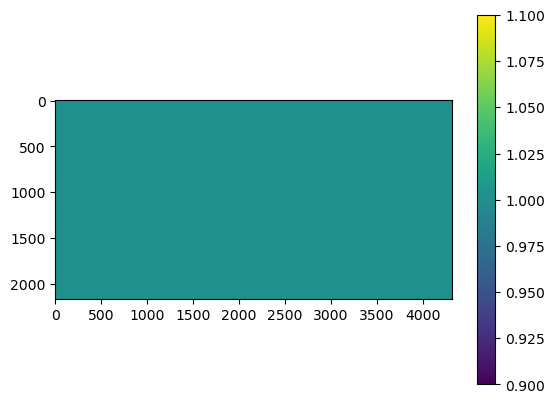

In [34]:
bio_sum = np.sum(bio_data, axis = -1, dtype = bool)
bio_prod = np.prod(bio_data, axis = -1,dtype = bool)
bio_sum == bio_prod
plt.imshow(bio_sum == bio_prod)
plt.colorbar()

In [35]:
np.all(bio_sum == bio_prod)

True

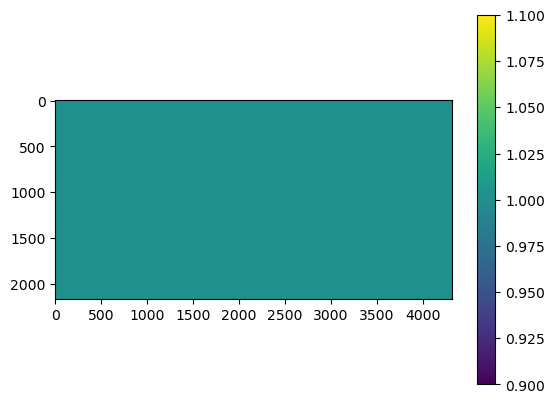

In [36]:
prec_sum = np.sum(prec_data, axis = -1, dtype = bool)
prec_prod = np.prod(prec_data, axis = -1,dtype = bool)
prec_sum == prec_prod
plt.imshow(prec_sum == prec_prod)
plt.colorbar()

In [37]:
np.all(prec_sum == prec_prod)

True

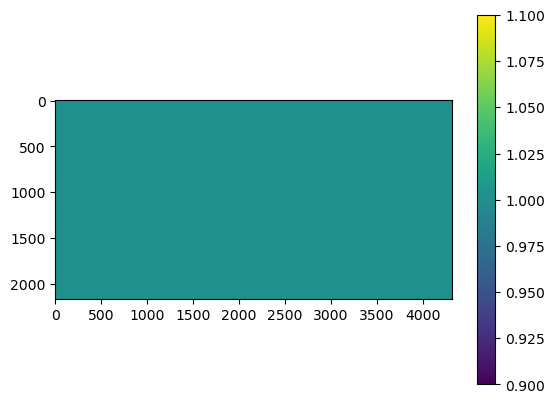

In [38]:
tavg_sum = np.sum(tavg_data, axis = -1, dtype = bool)
tavg_prod = np.prod(tavg_data, axis = -1,dtype = bool)
tavg_sum == tavg_prod
plt.imshow(tavg_sum == tavg_prod)
plt.colorbar()

In [39]:
np.all(tavg_sum == tavg_prod)

True

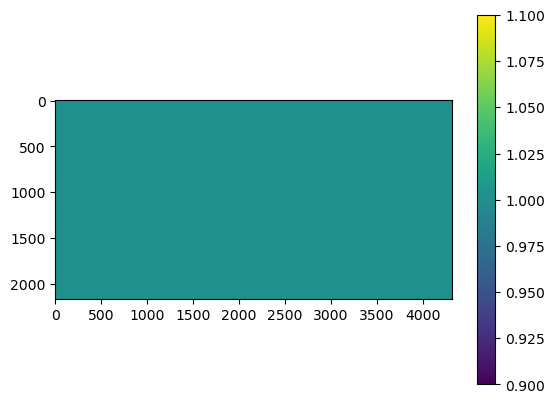

In [40]:
tmax_sum = np.sum(tmax_data, axis = -1, dtype = bool)
tmax_prod = np.prod(tmax_data, axis = -1,dtype = bool)
tmax_sum == tmax_prod
plt.imshow(tmax_sum == tmax_prod)
plt.colorbar()

In [41]:
np.all(tmax_sum == tmax_prod)

True

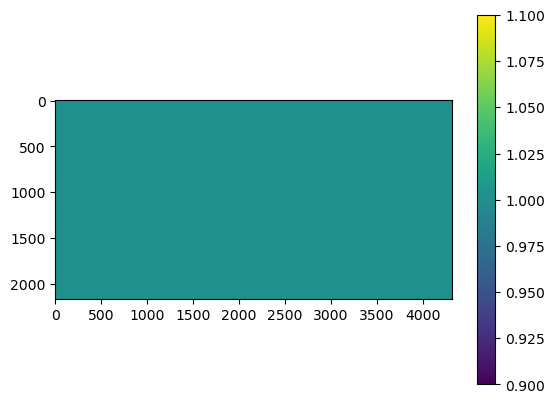

In [42]:
tmin_sum = np.sum(tmin_data, axis = -1, dtype = bool)
tmin_prod = np.prod(tmin_data, axis = -1,dtype = bool)
tmin_sum == tmin_prod
plt.imshow(tmin_sum == tmin_prod)
plt.colorbar()

In [43]:
np.all(tmin_sum == tmin_prod)

True

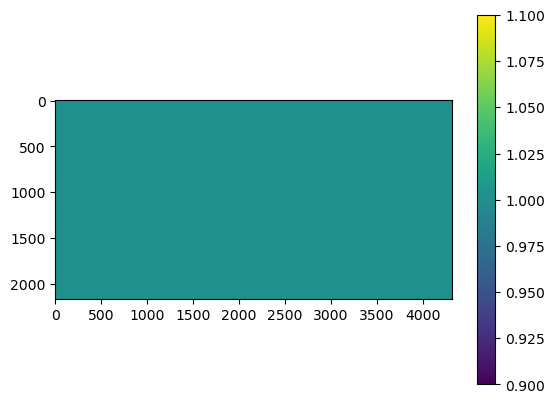

In [44]:
all_sum = np.sum((bio_sum, prec_sum, tavg_sum, tmax_sum, tmin_sum) , axis = 0 , dtype = bool)
all_prod = np.prod((bio_prod, prec_prod, tavg_prod, tmax_prod, tmin_prod) , axis = 0 , dtype = bool)
plt.imshow(all_sum == all_prod)
plt.colorbar()

In [45]:
all_sum.shape

(2160, 4320)

In [46]:
all_prod.shape

(2160, 4320)

In [47]:
np.all(all_sum == all_prod)

True

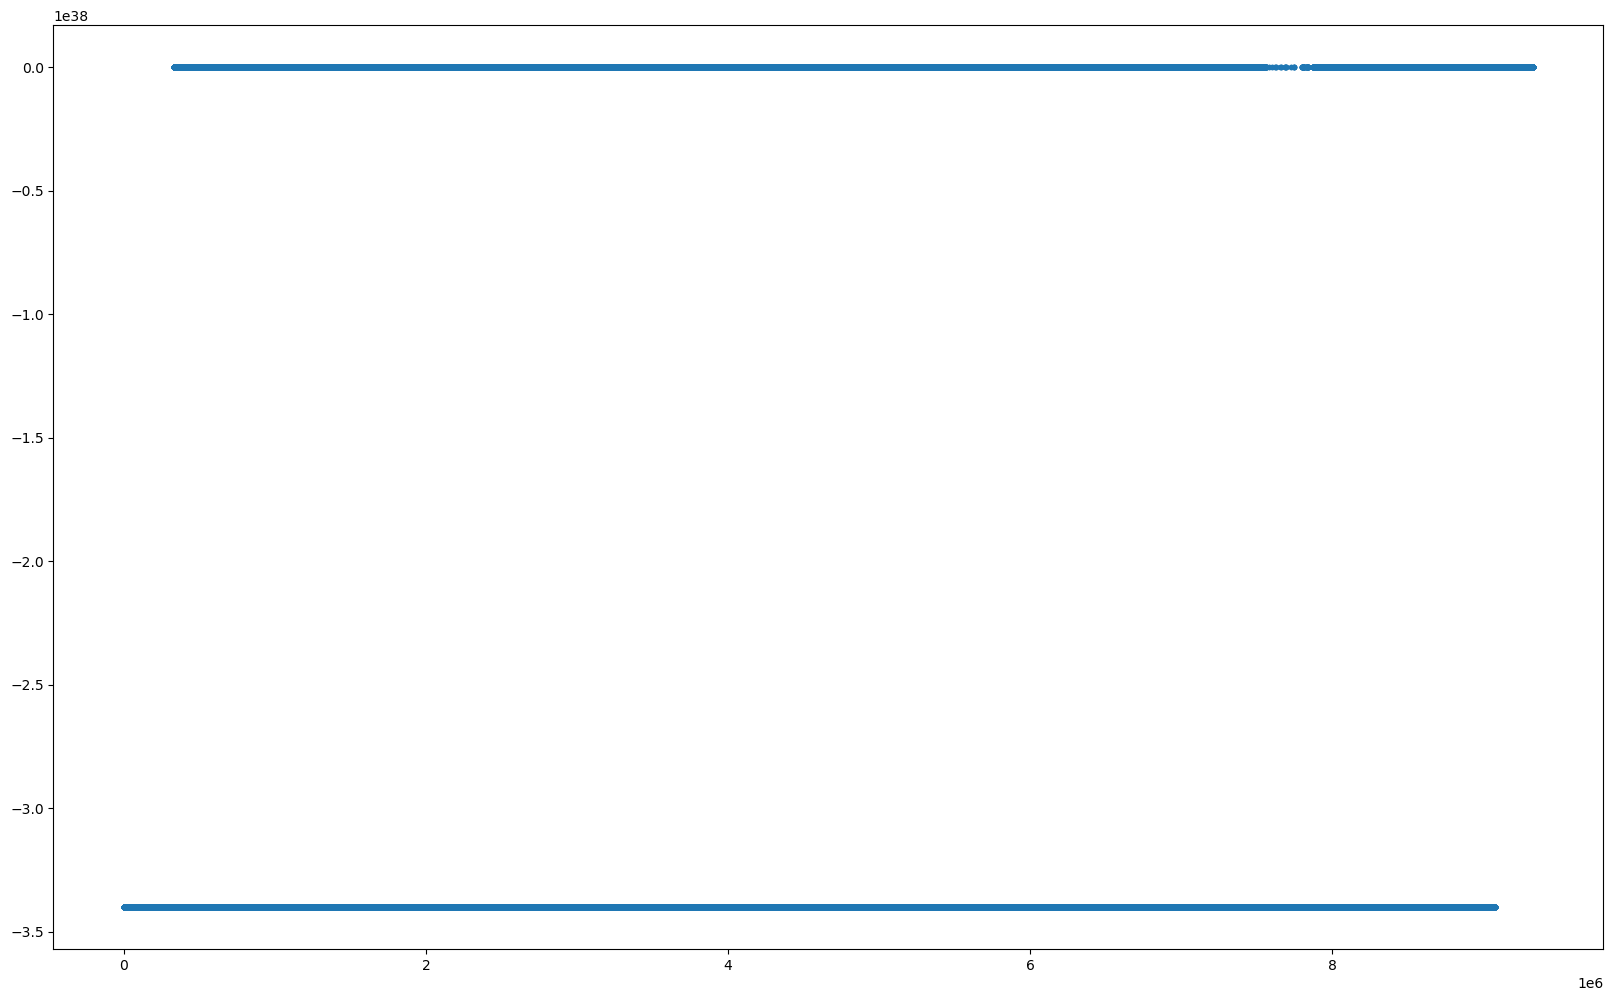

In [48]:
plt.figure(figsize=(20,12))
plt.plot(data1a.flatten(),linestyle='none',marker='.')

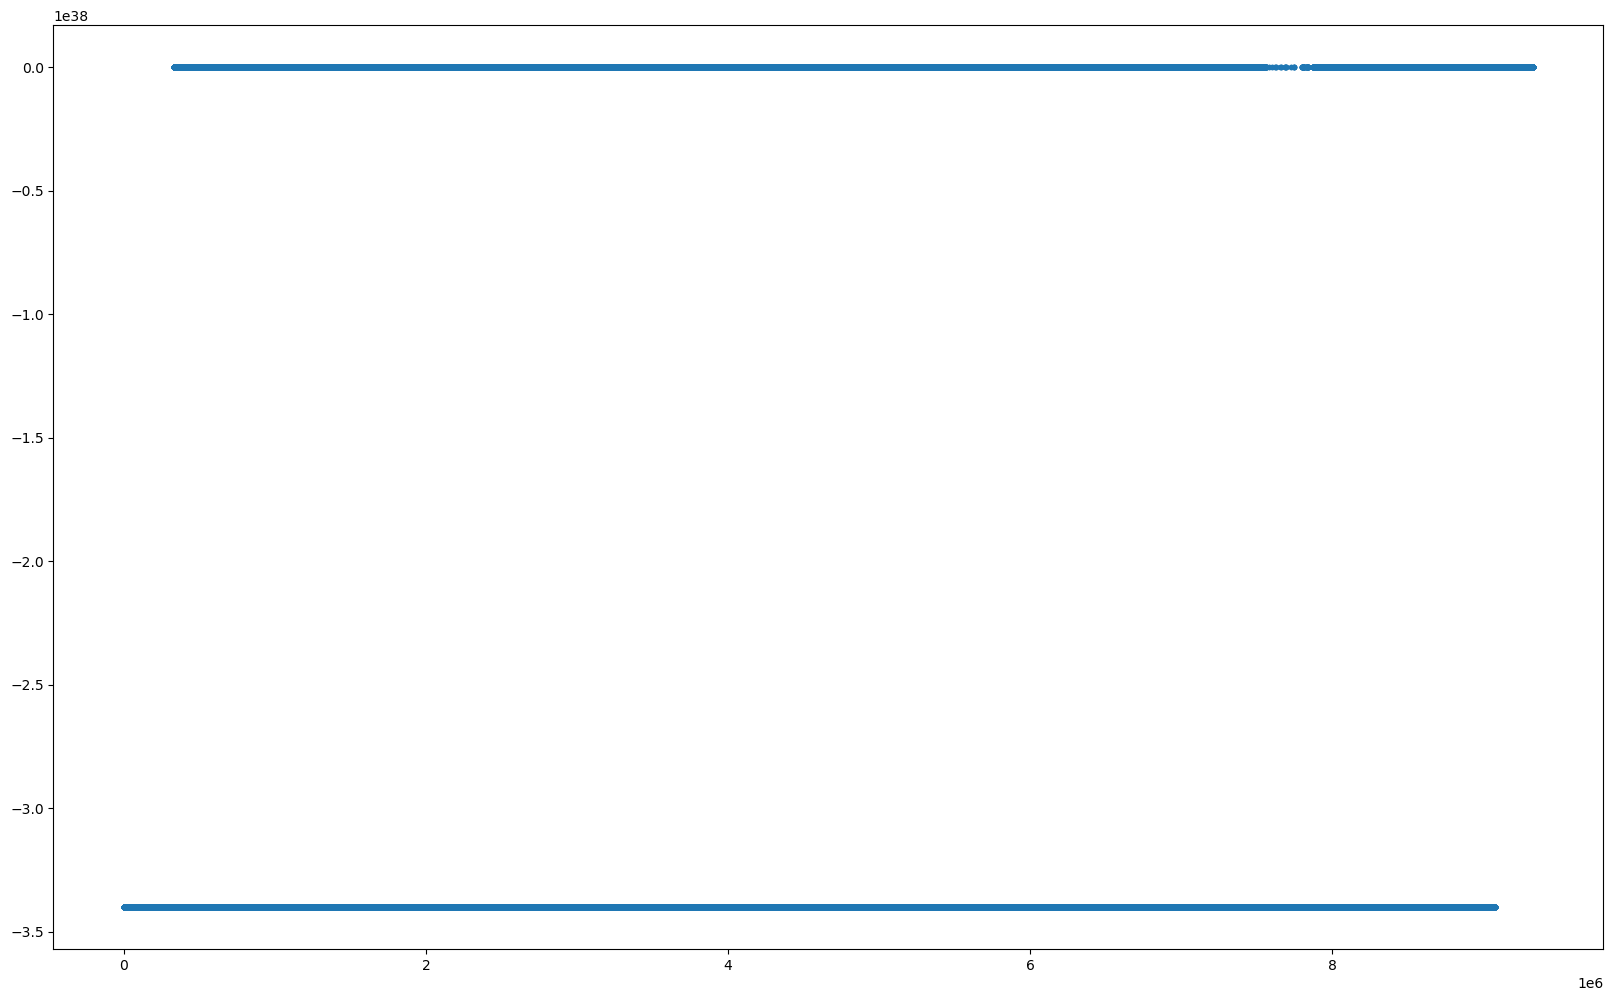

In [49]:
plt.figure(figsize=(20,12))
plt.plot(data1b.flatten(),linestyle='none',marker='.')

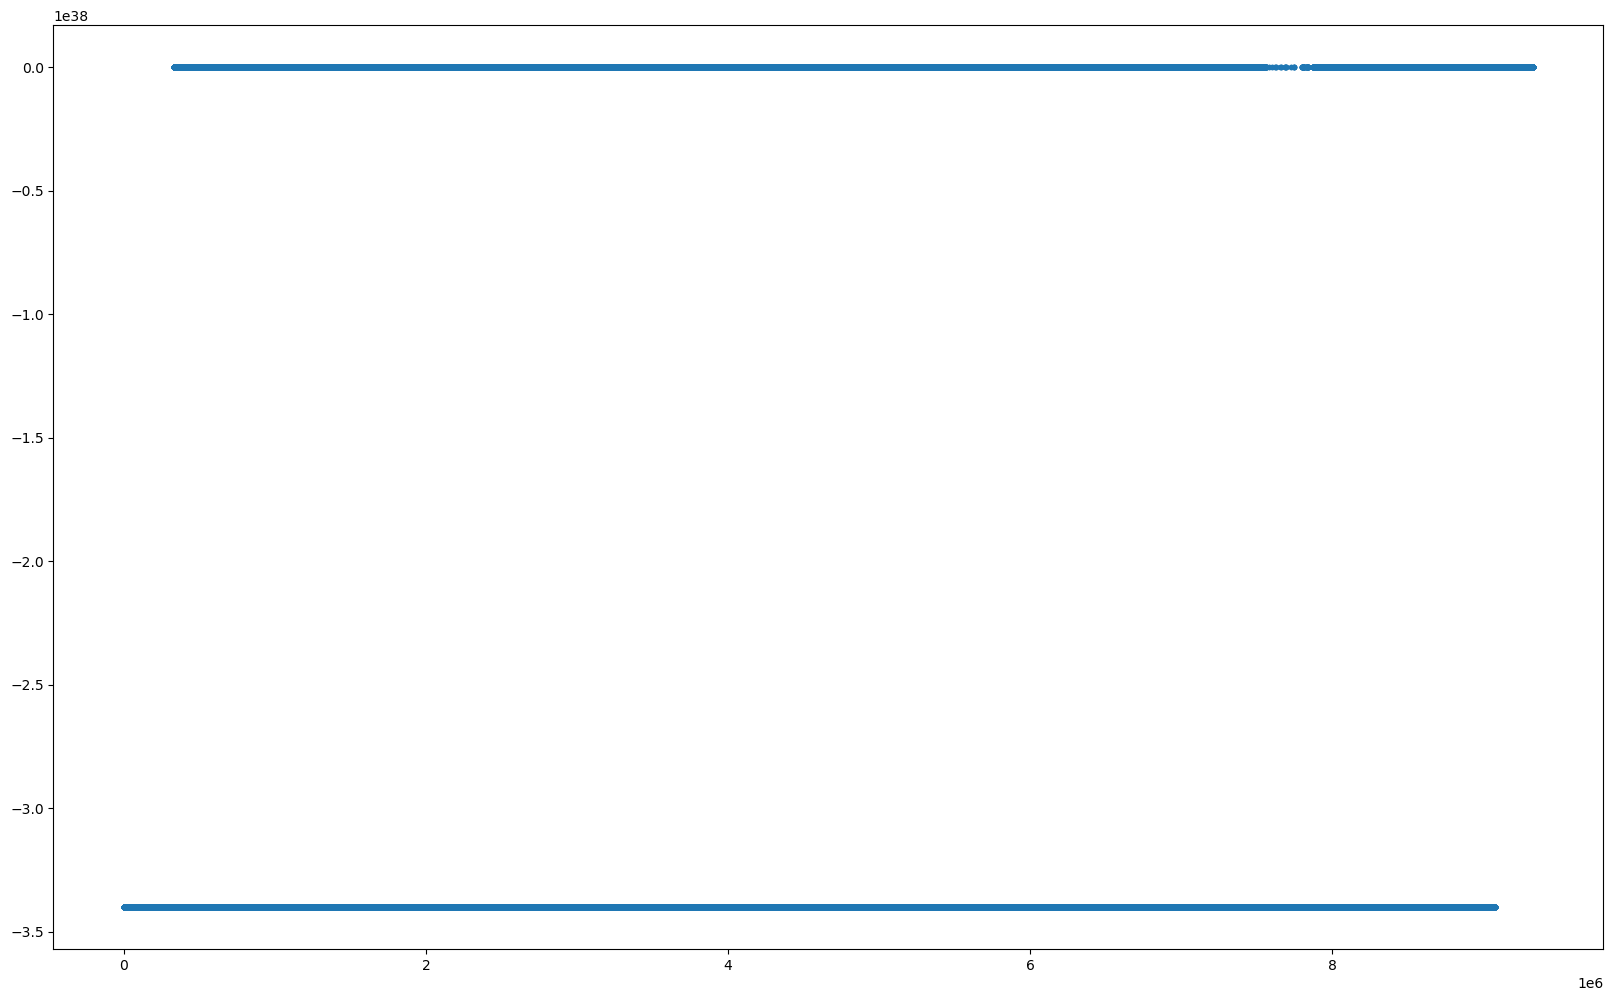

In [50]:
plt.figure(figsize=(20,12))
plt.plot(data1c.flatten(),linestyle='none',marker='.')

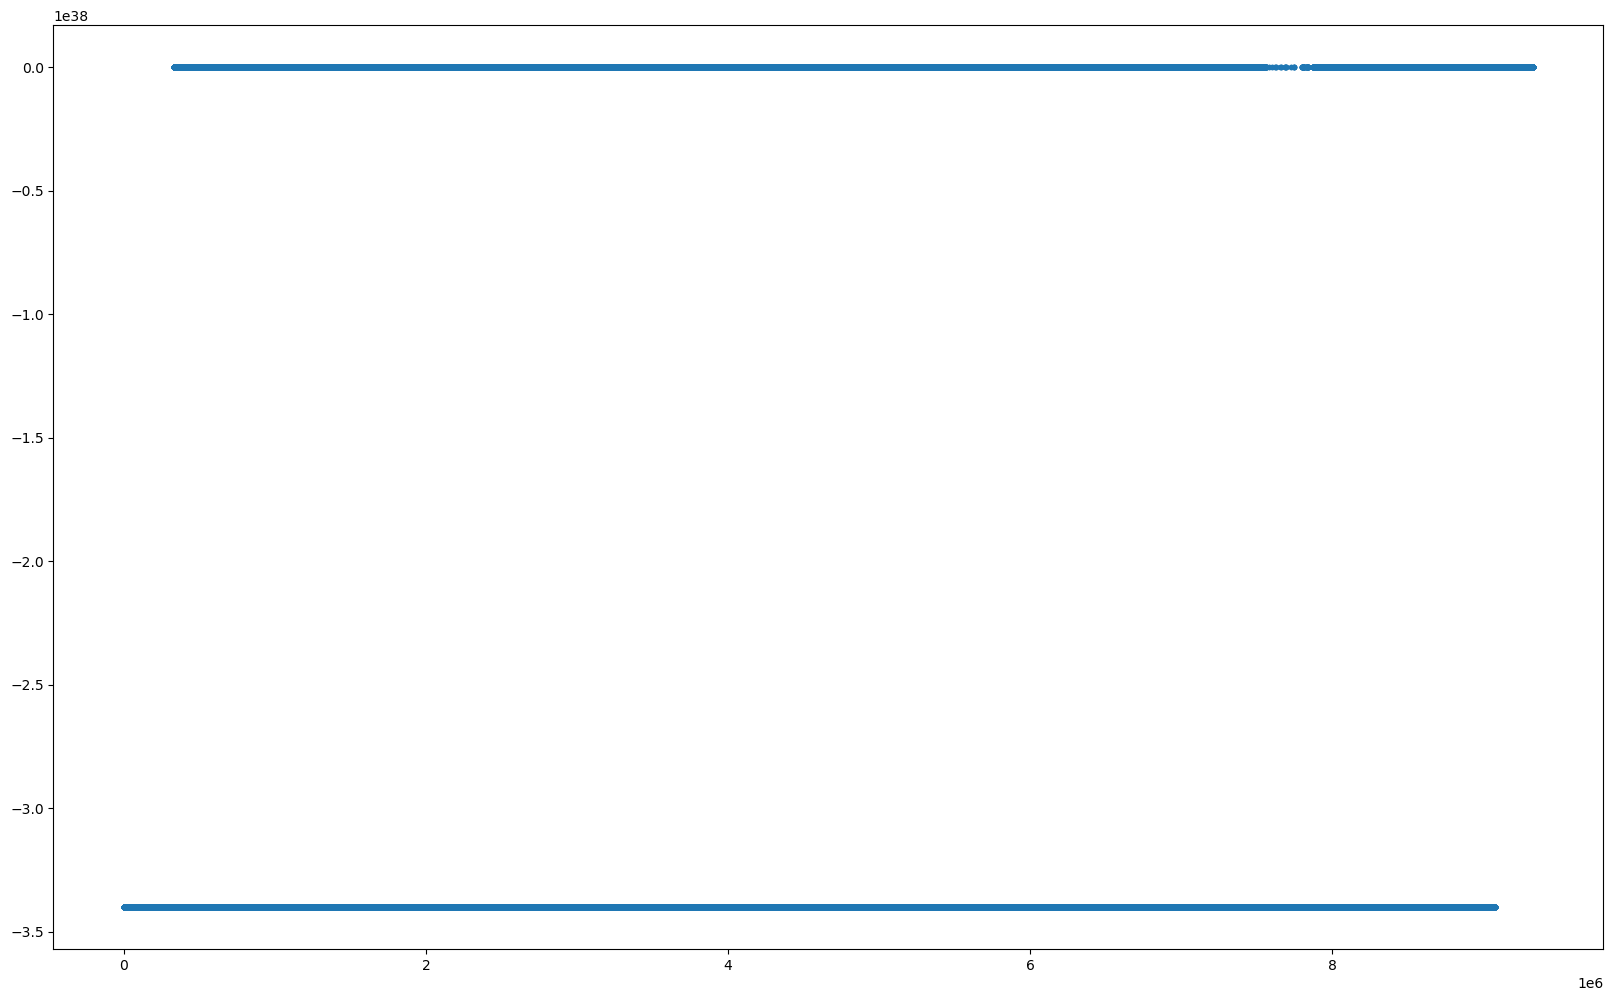

In [51]:
plt.figure(figsize=(20,12))
plt.plot(data1d.flatten(),linestyle='none',marker='.')

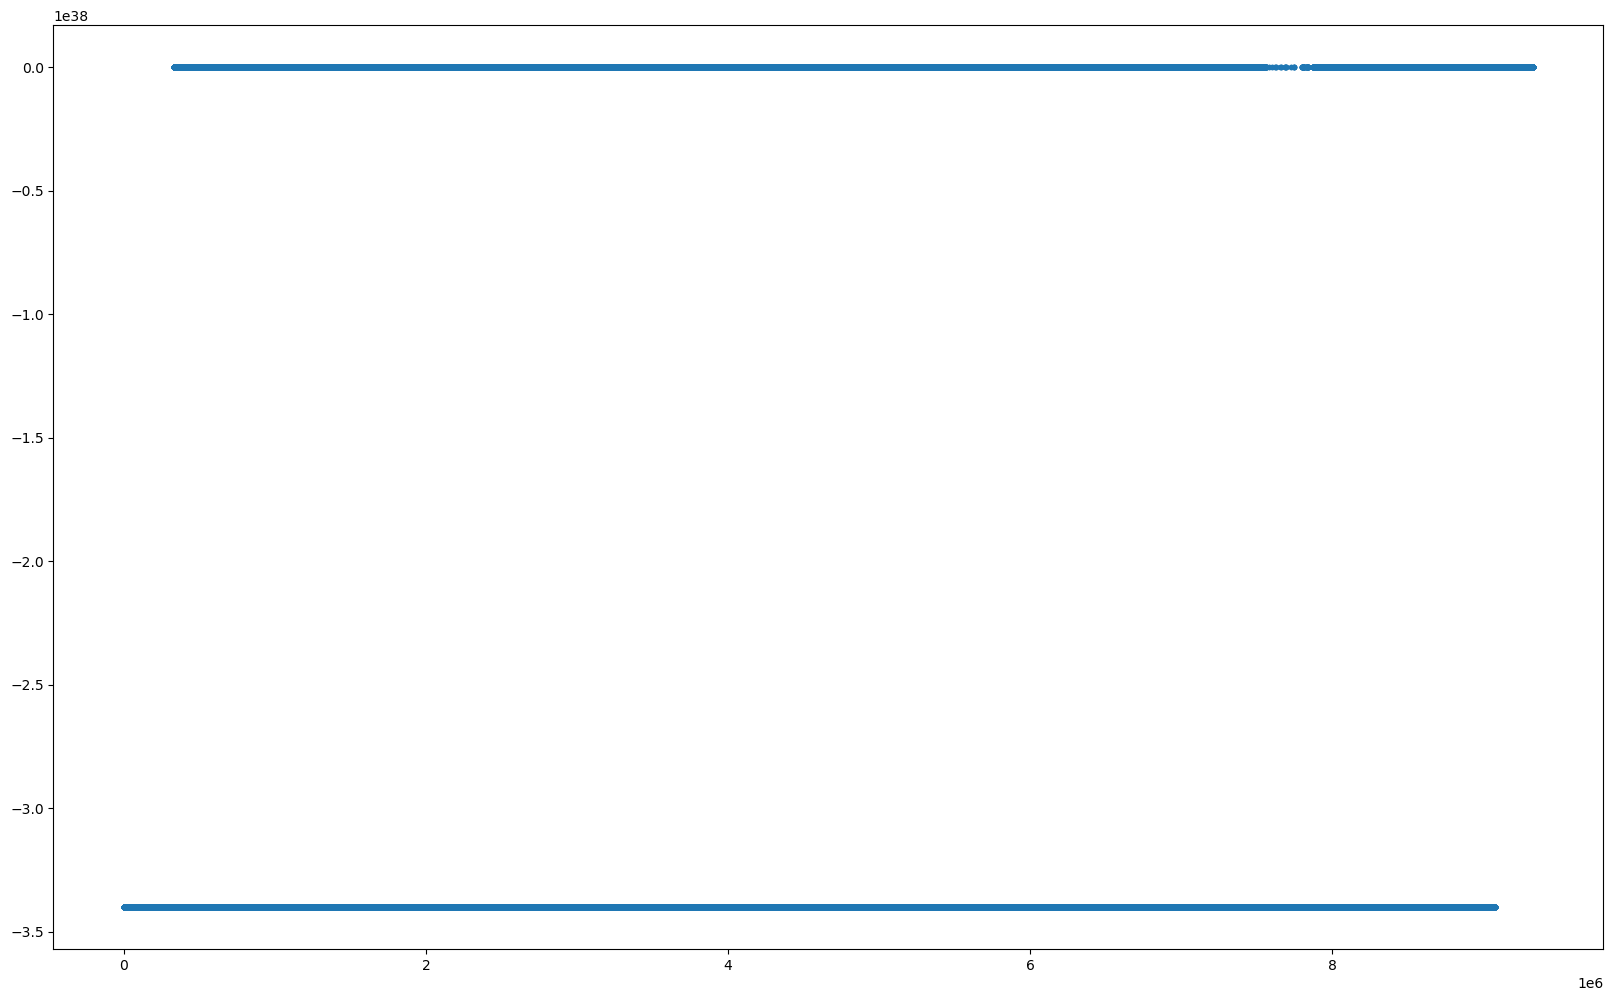

In [52]:
plt.figure(figsize=(20,12))
plt.plot(data1e.flatten(),linestyle='none',marker='.')

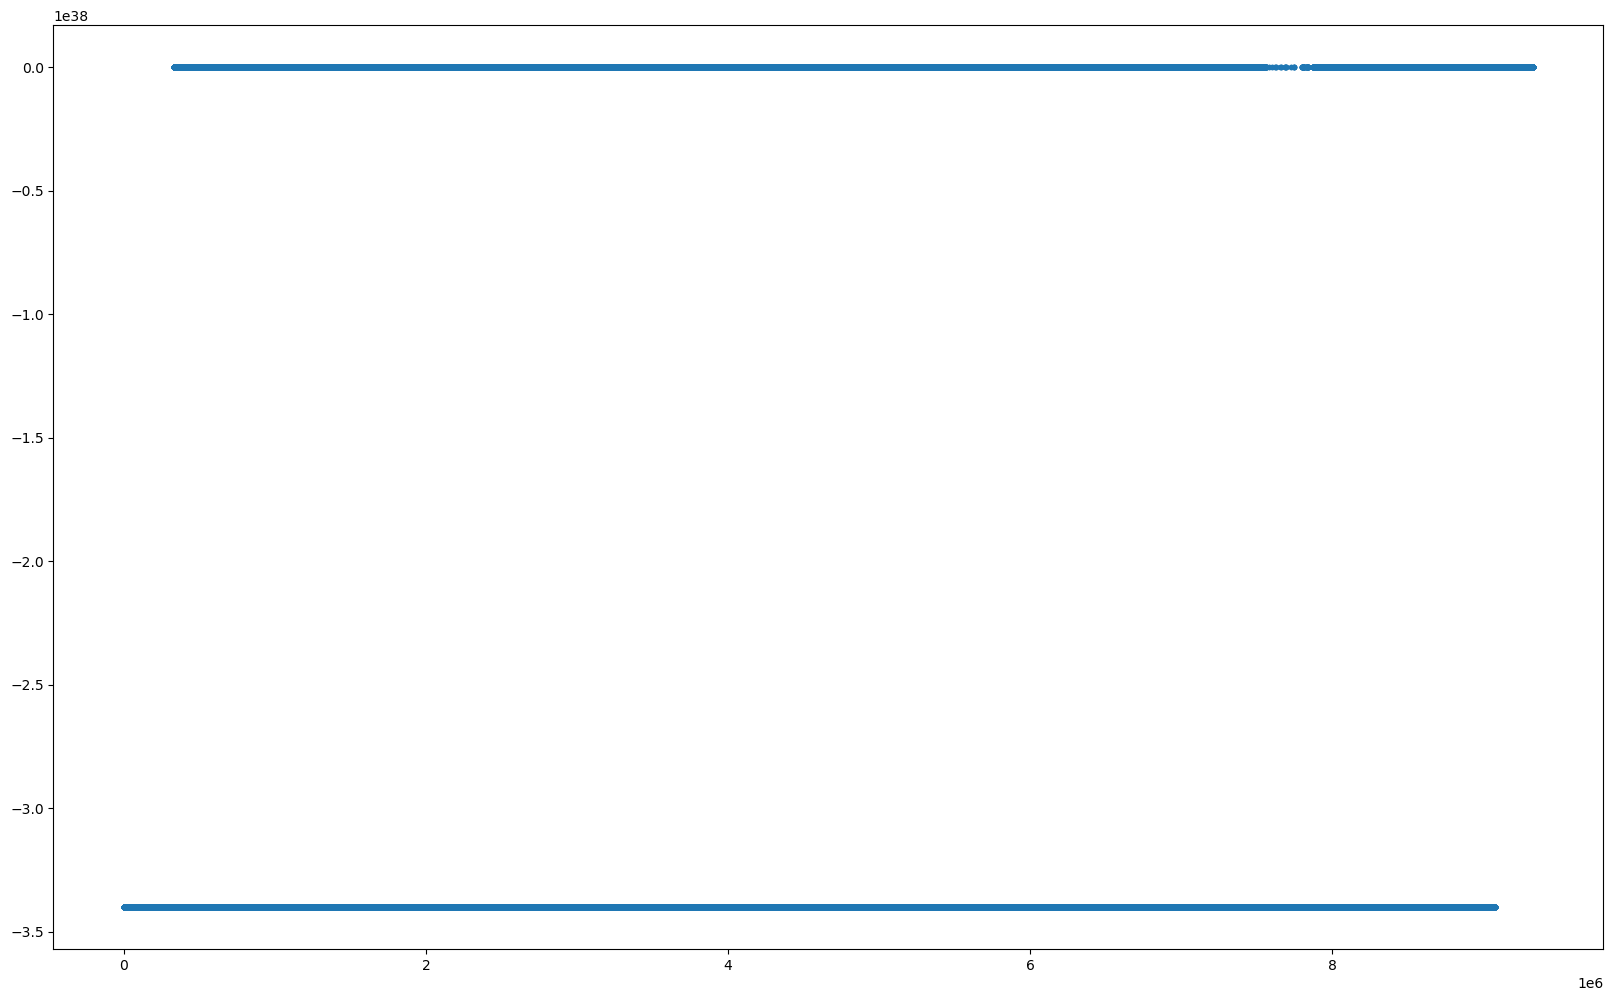

In [53]:
plt.figure(figsize=(20,12))
plt.plot(data1f.flatten(),linestyle='none',marker='.')

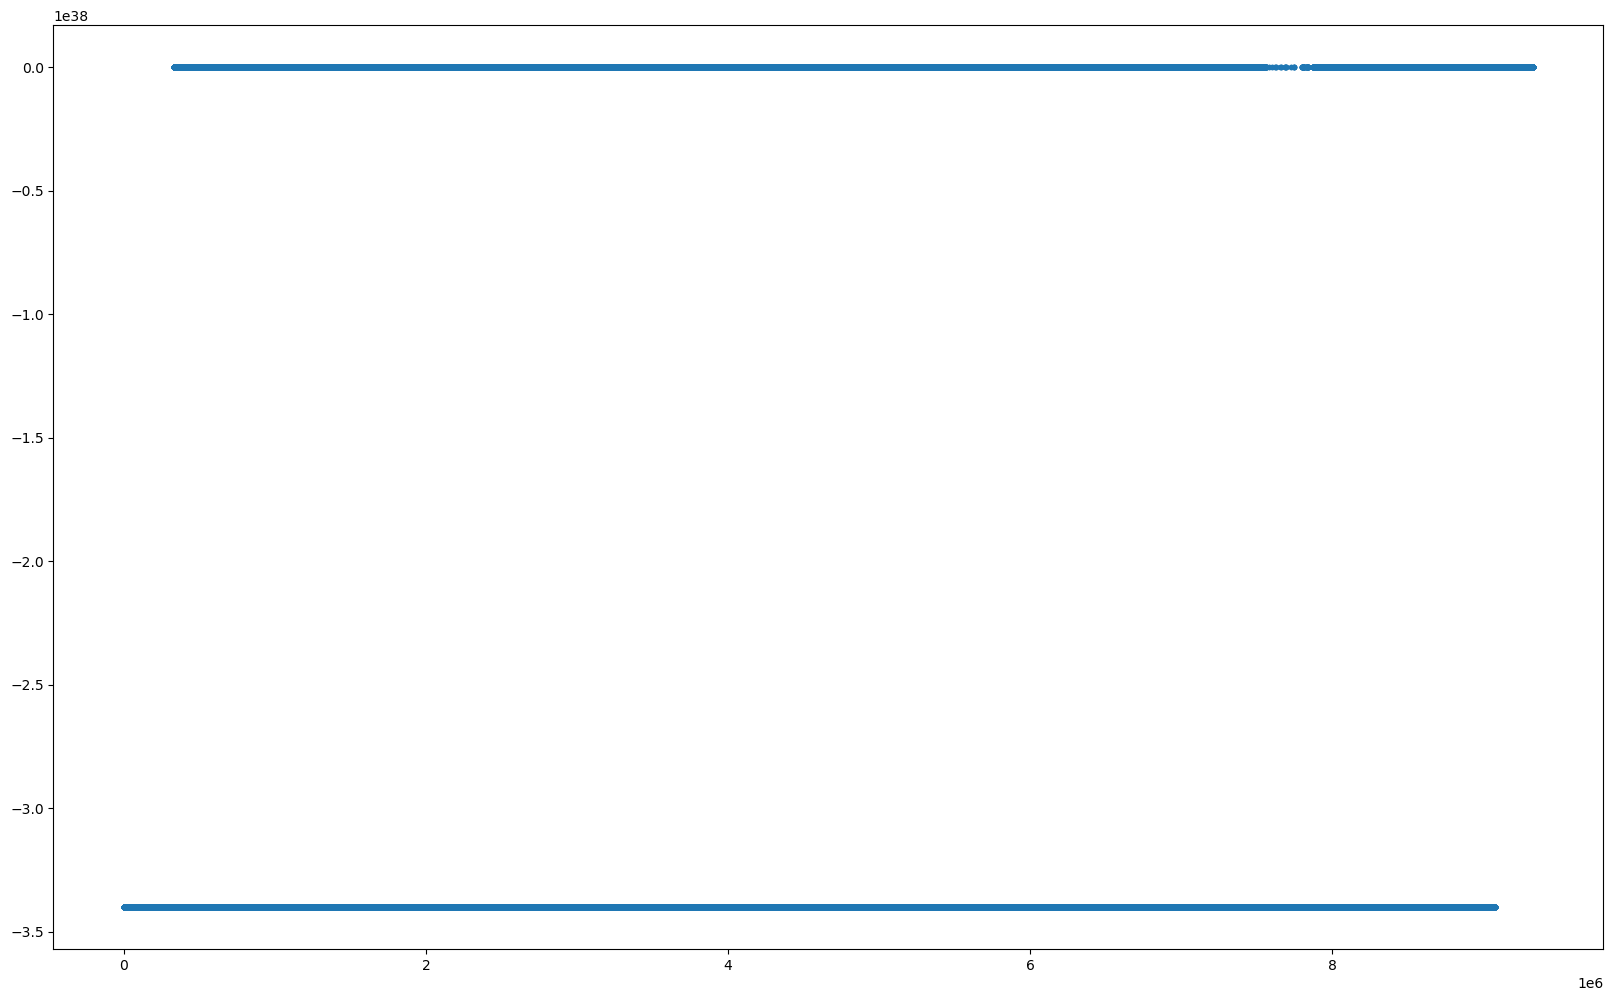

In [54]:
plt.figure(figsize=(20,12))
plt.plot(data1g.flatten(),linestyle='none',marker='.')

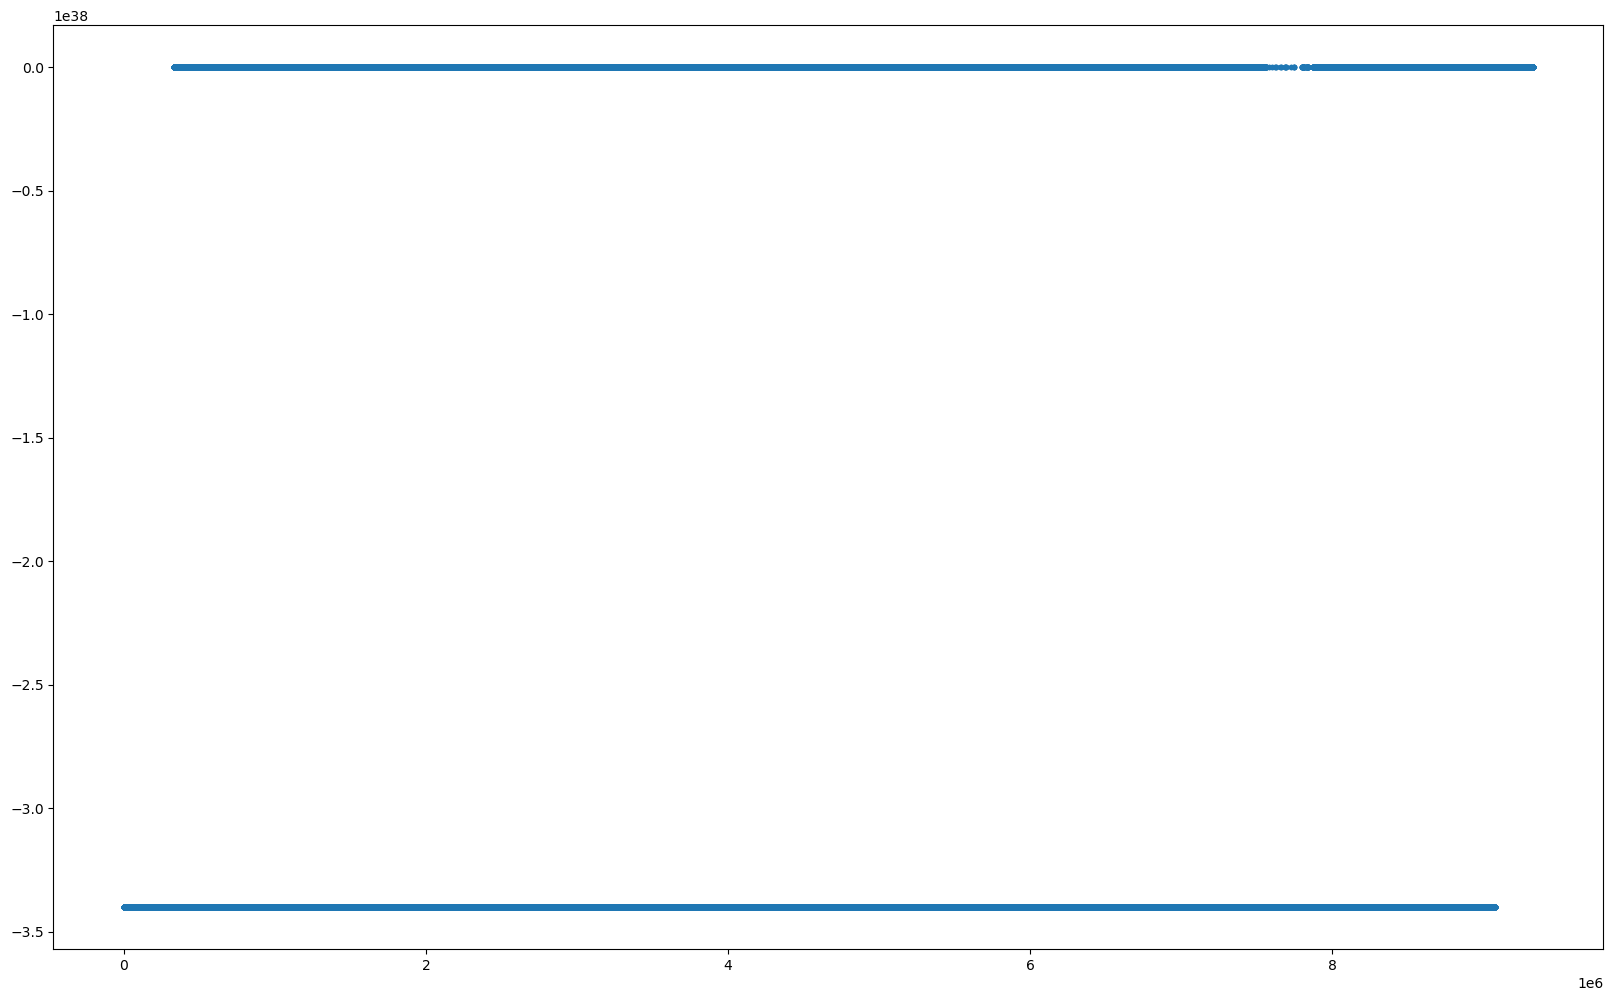

In [55]:
plt.figure(figsize=(20,12))
plt.plot(data1h.flatten(),linestyle='none',marker='.')

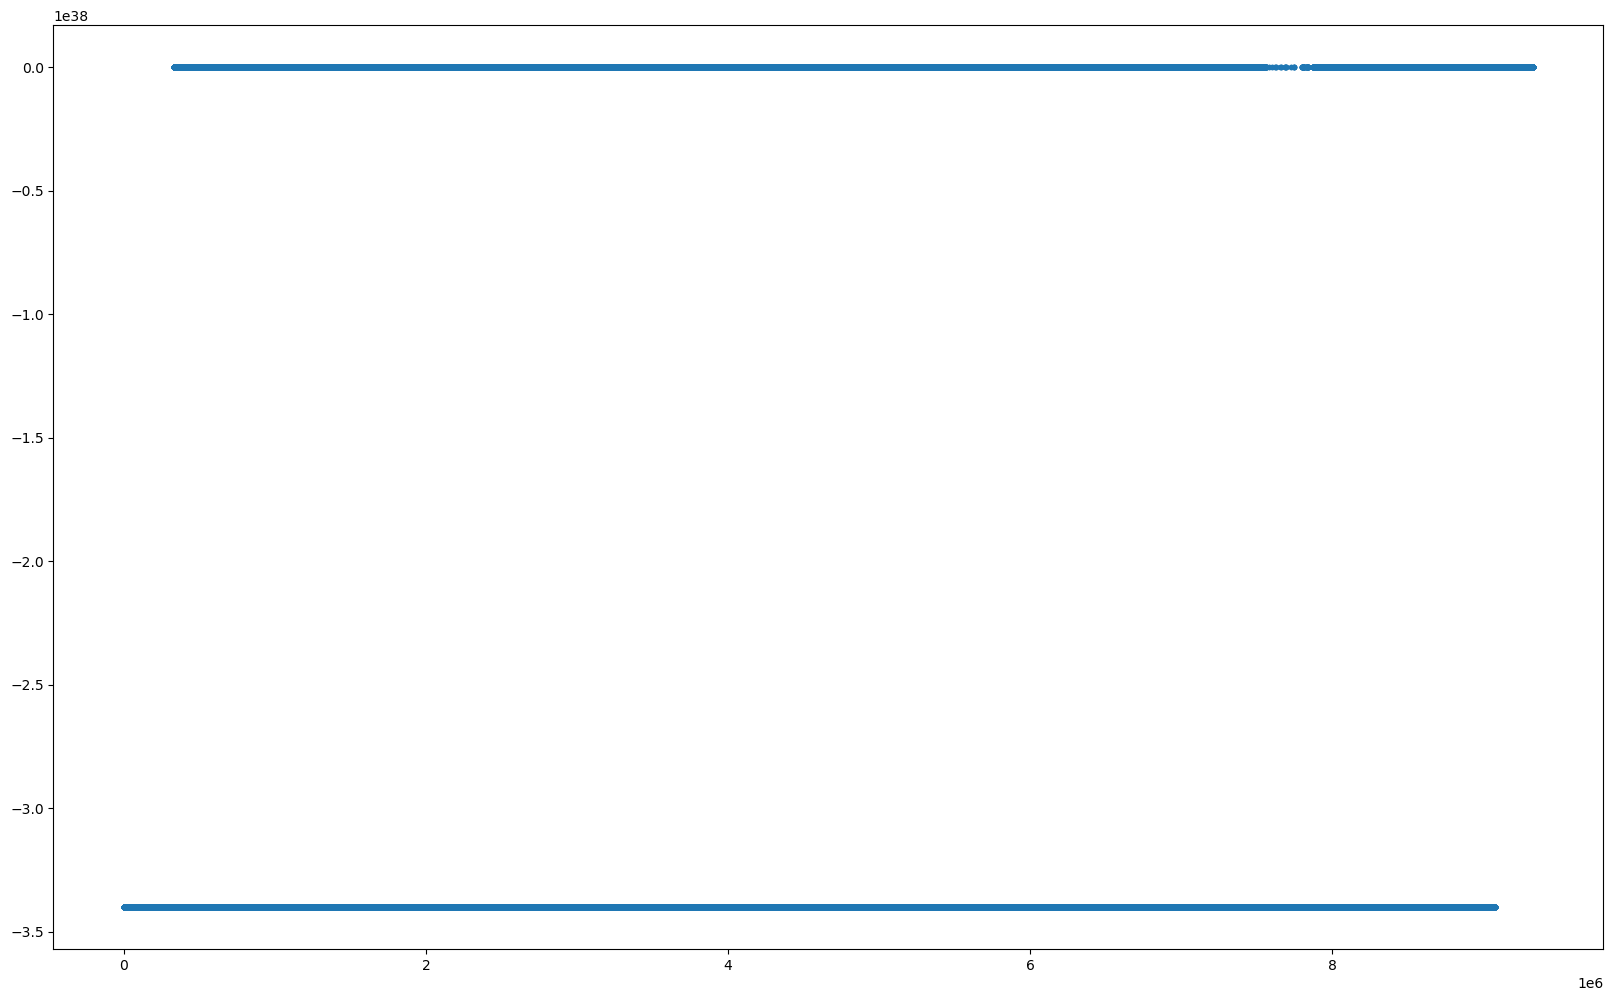

In [56]:
plt.figure(figsize=(20,12))
plt.plot(data1i.flatten(),linestyle='none',marker='.')

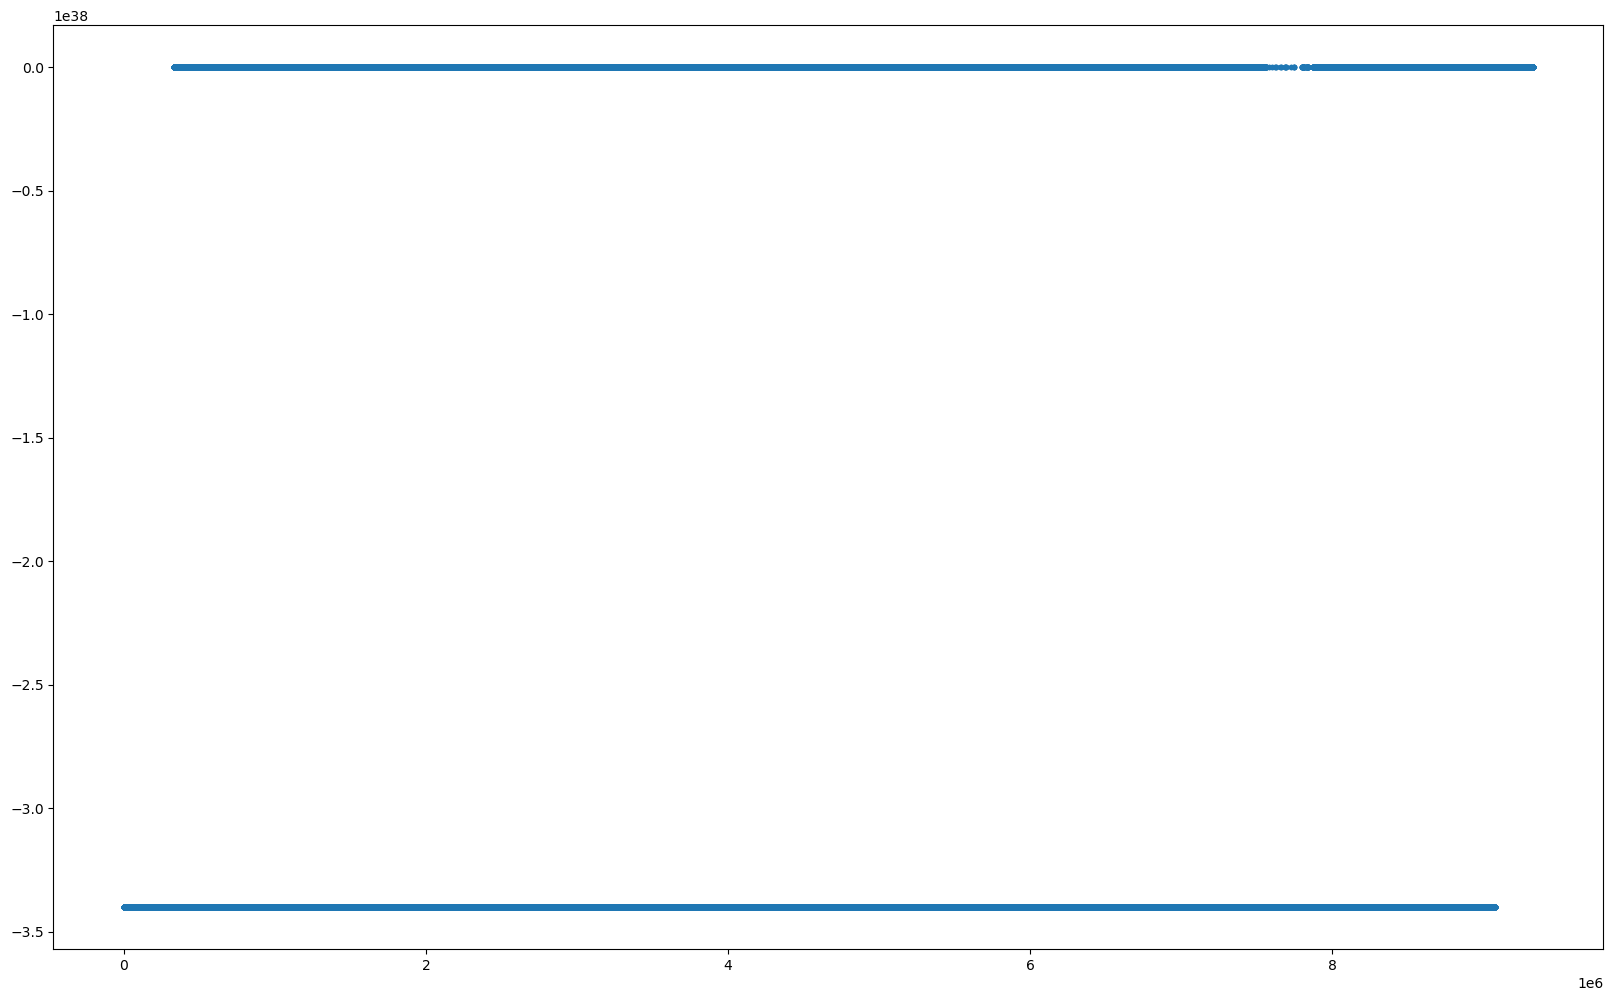

In [57]:
plt.figure(figsize=(20,12))
plt.plot(data1j.flatten(),linestyle='none',marker='.')

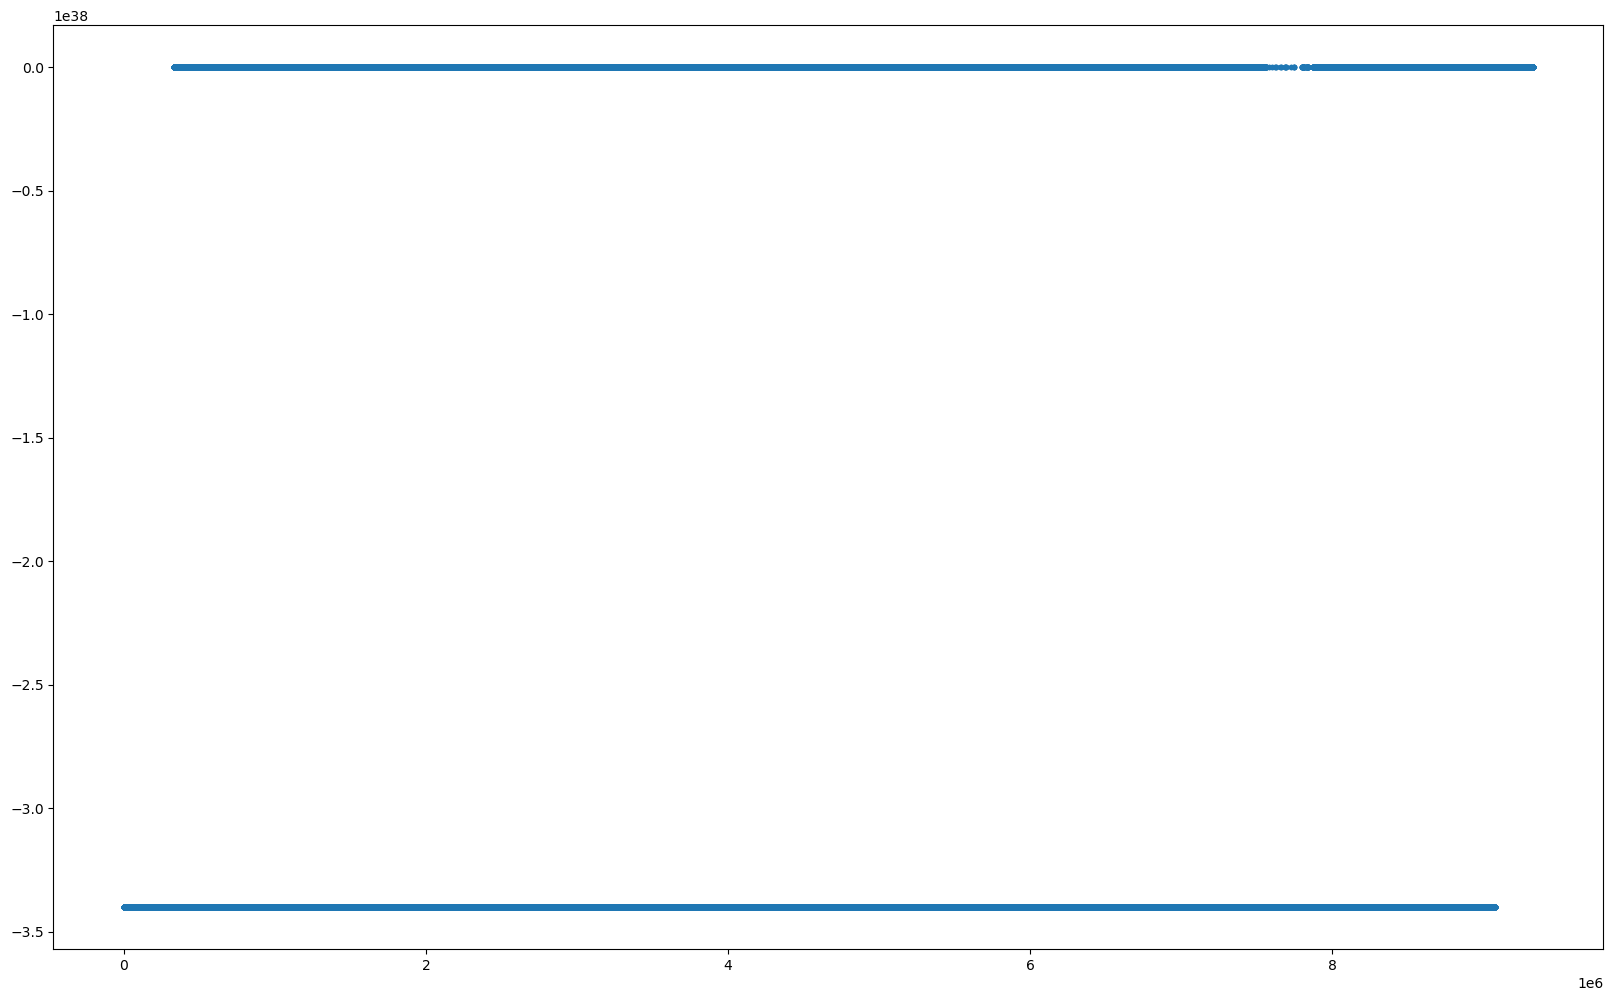

In [58]:
plt.figure(figsize=(20,12))
plt.plot(data1k.flatten(),linestyle='none',marker='.')

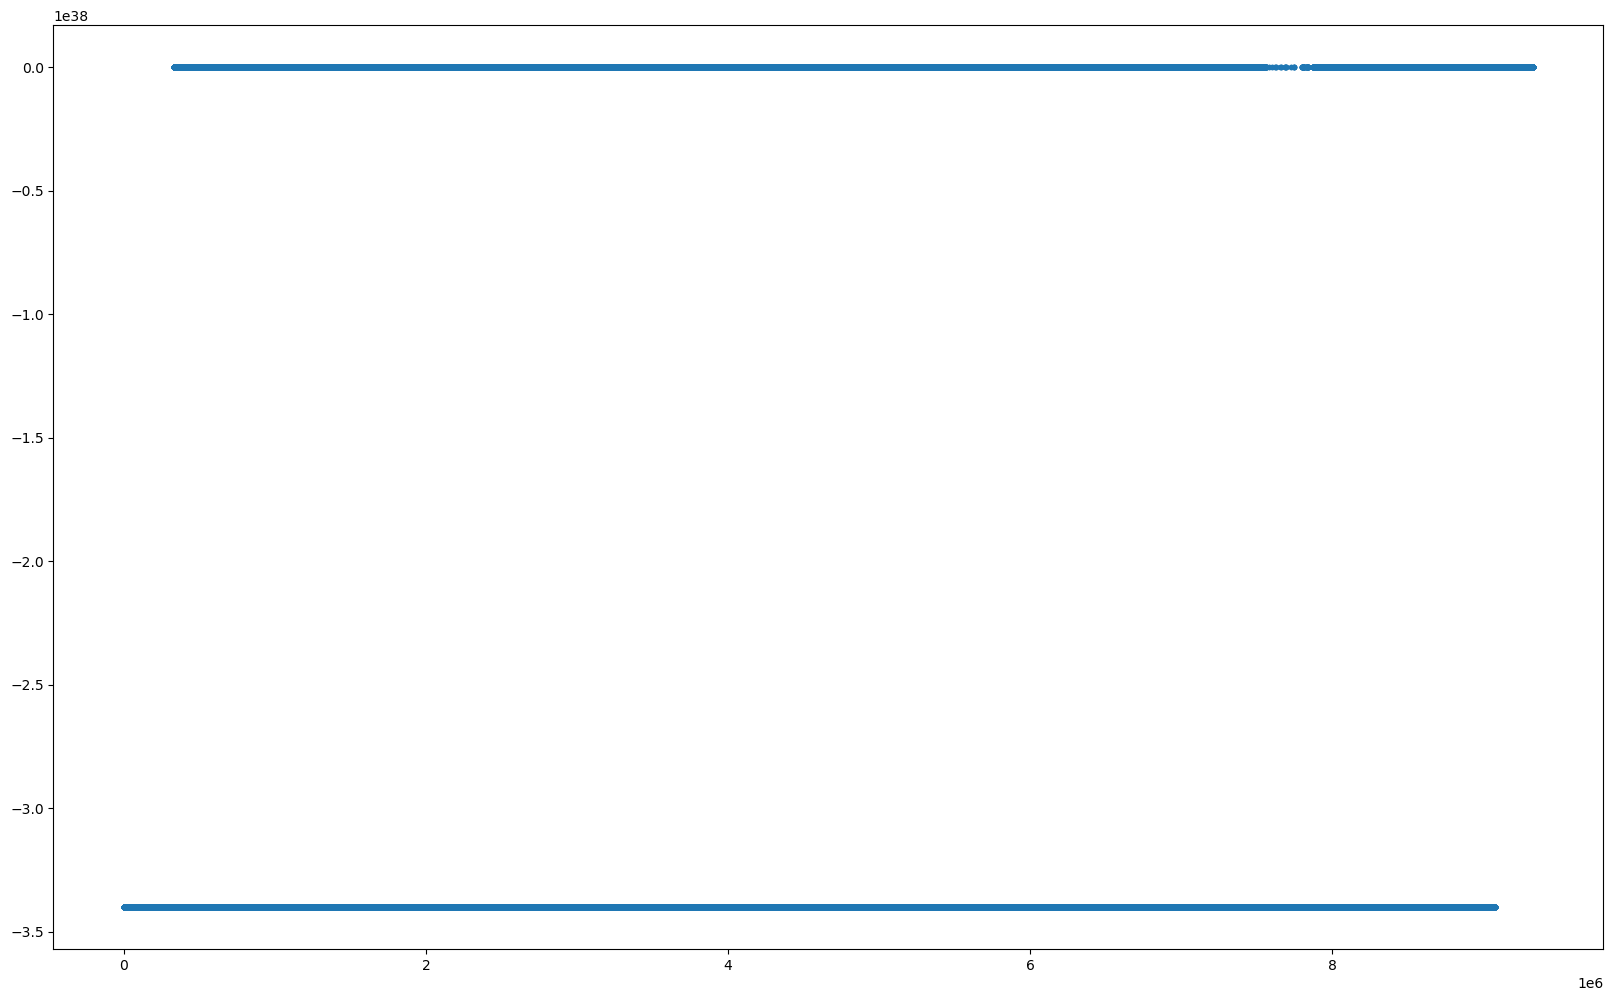

In [59]:
plt.figure(figsize=(20,12))
plt.plot(data1l.flatten(),linestyle='none',marker='.')

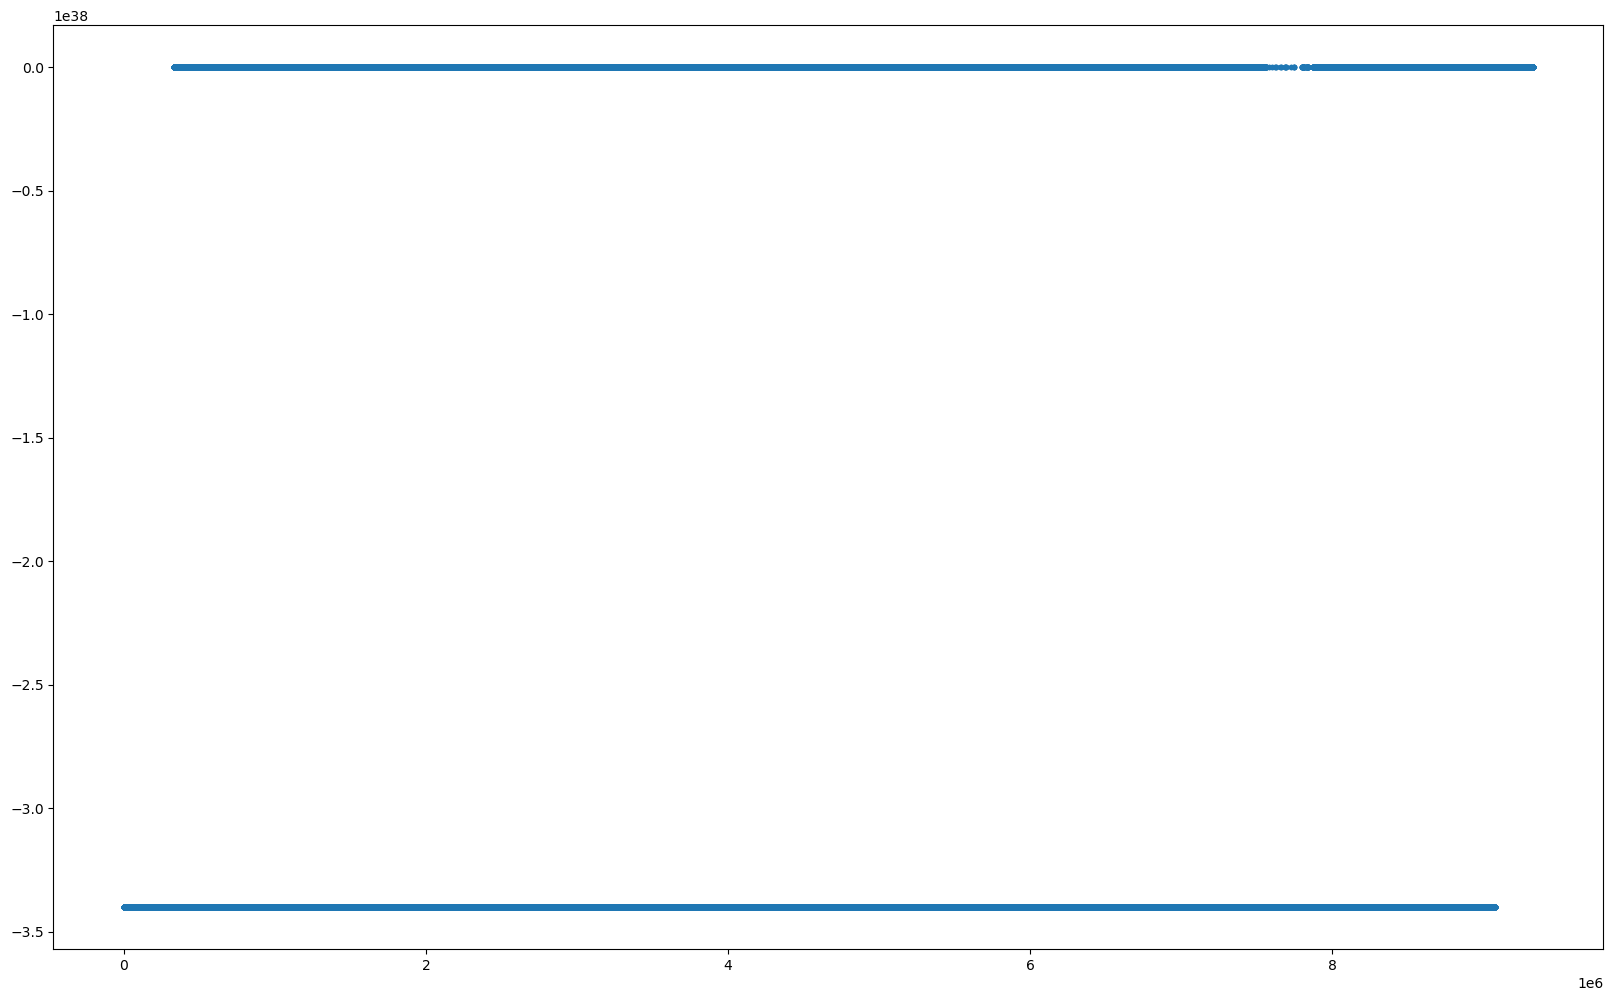

In [60]:
plt.figure(figsize=(20,12))
plt.plot(data1m.flatten(),linestyle='none',marker='.')

In [61]:
plt.figure(figsize=(20,12))
plt.plot(data1n.flatten(),linestyle='none',marker='.')

Error in callback <function flush_figures at 0x000001356AA85D00> (for post_execute):


KeyboardInterrupt: 

In [62]:
plt.figure(figsize=(20,12))
plt.plot(data1o.flatten(),linestyle='none',marker='.')

Error in callback <function flush_figures at 0x000001356AA85D00> (for post_execute):


KeyboardInterrupt: 

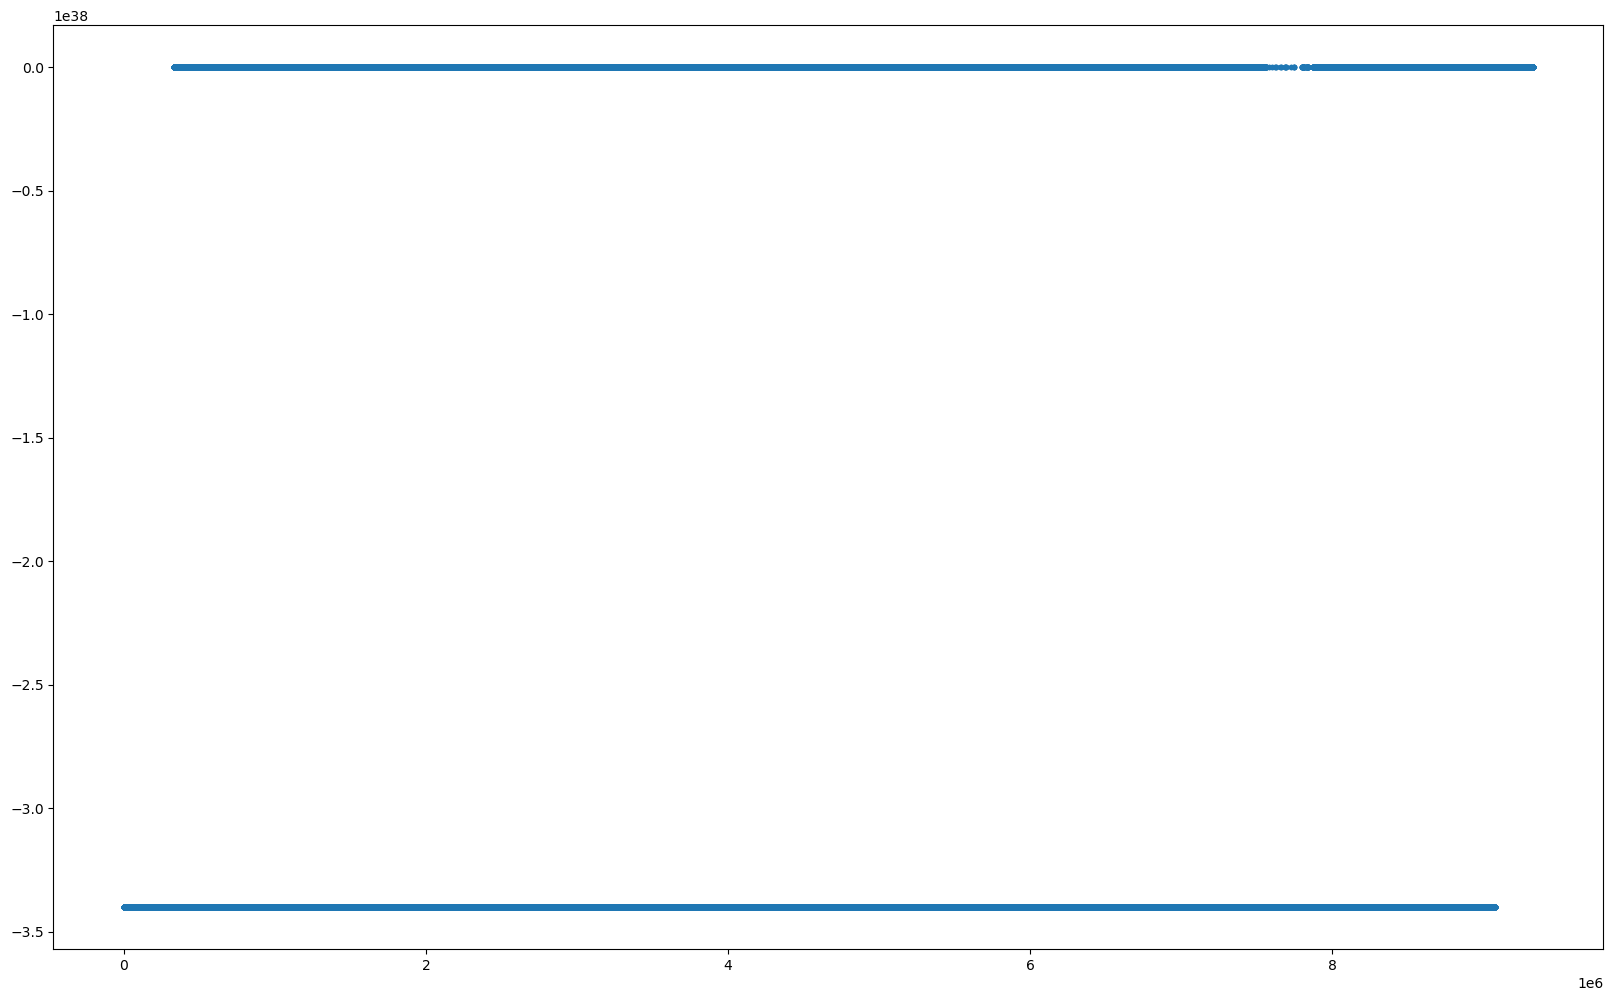

In [63]:
plt.figure(figsize=(20,12))
plt.plot(data1p.flatten(),linestyle='none',marker='.')

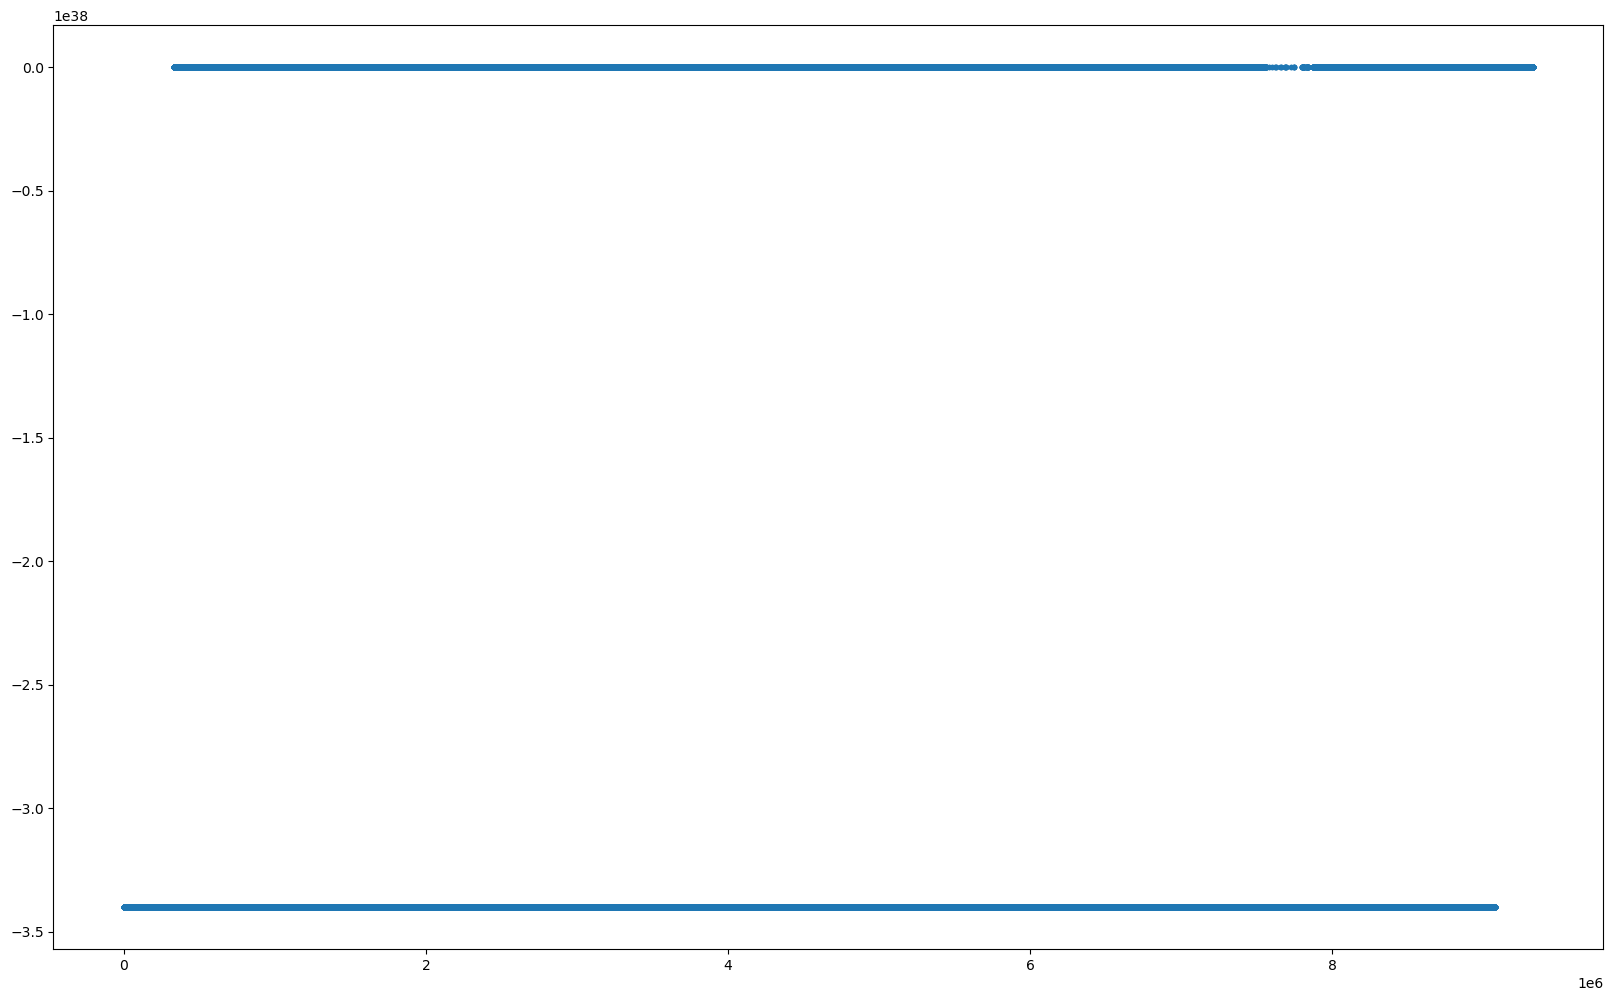

In [64]:
plt.figure(figsize=(20,12))
plt.plot(data1q.flatten(),linestyle='none',marker='.')

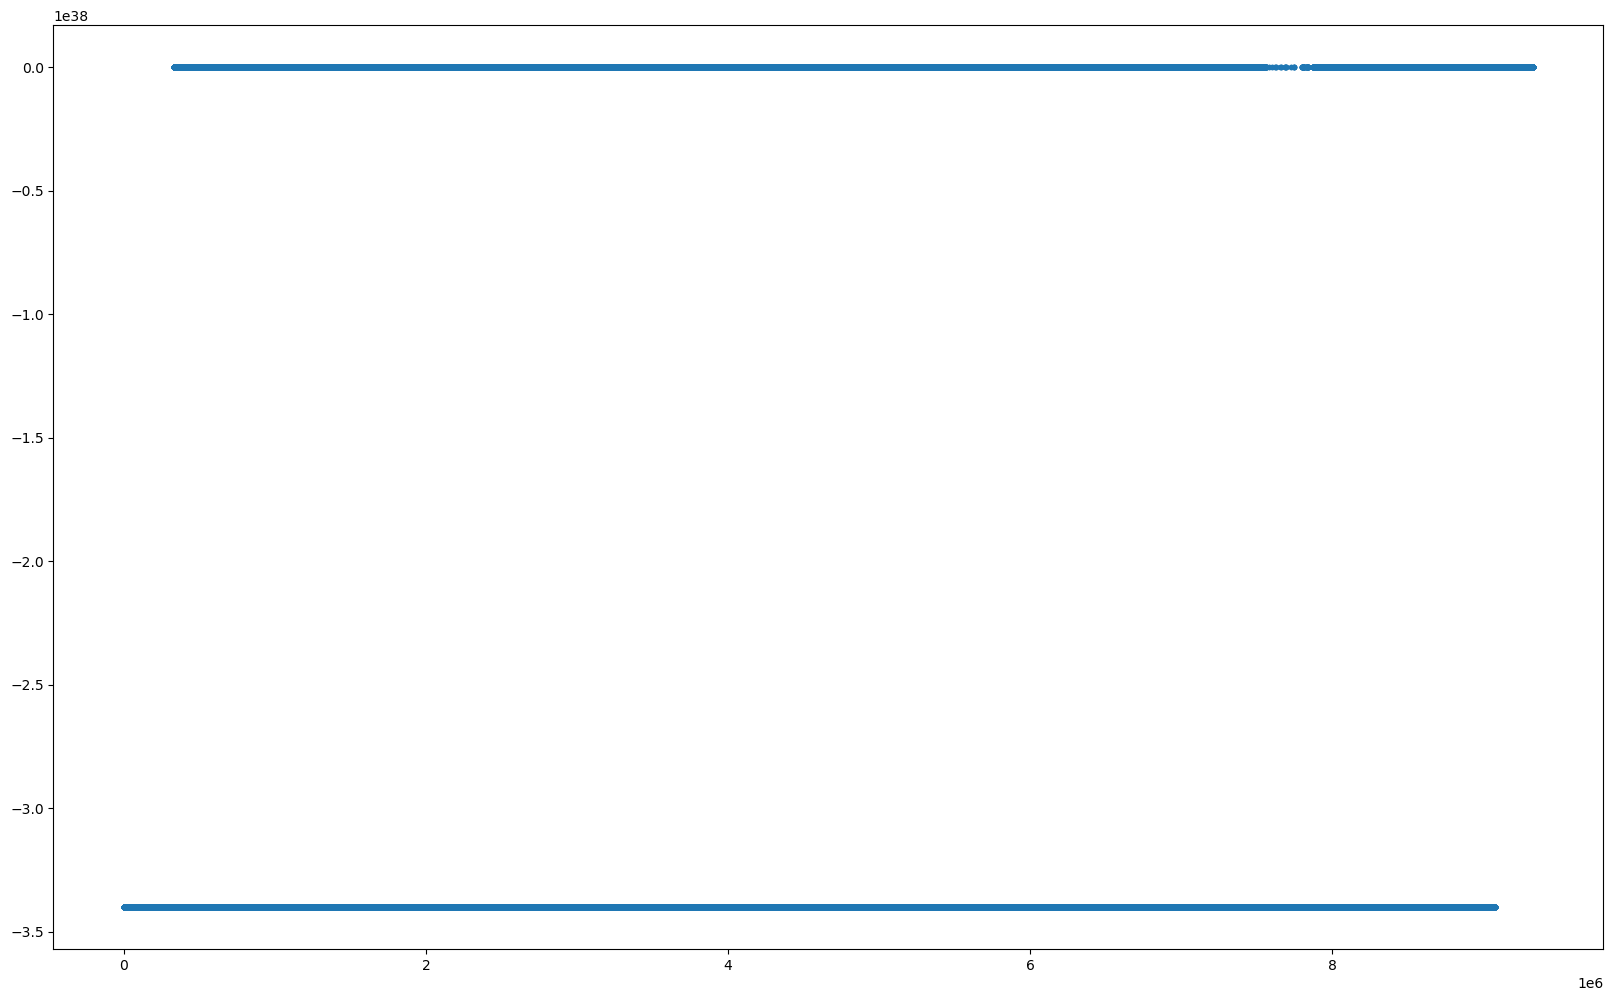

In [65]:
plt.figure(figsize=(20,12))
plt.plot(data1r.flatten(),linestyle='none',marker='.')

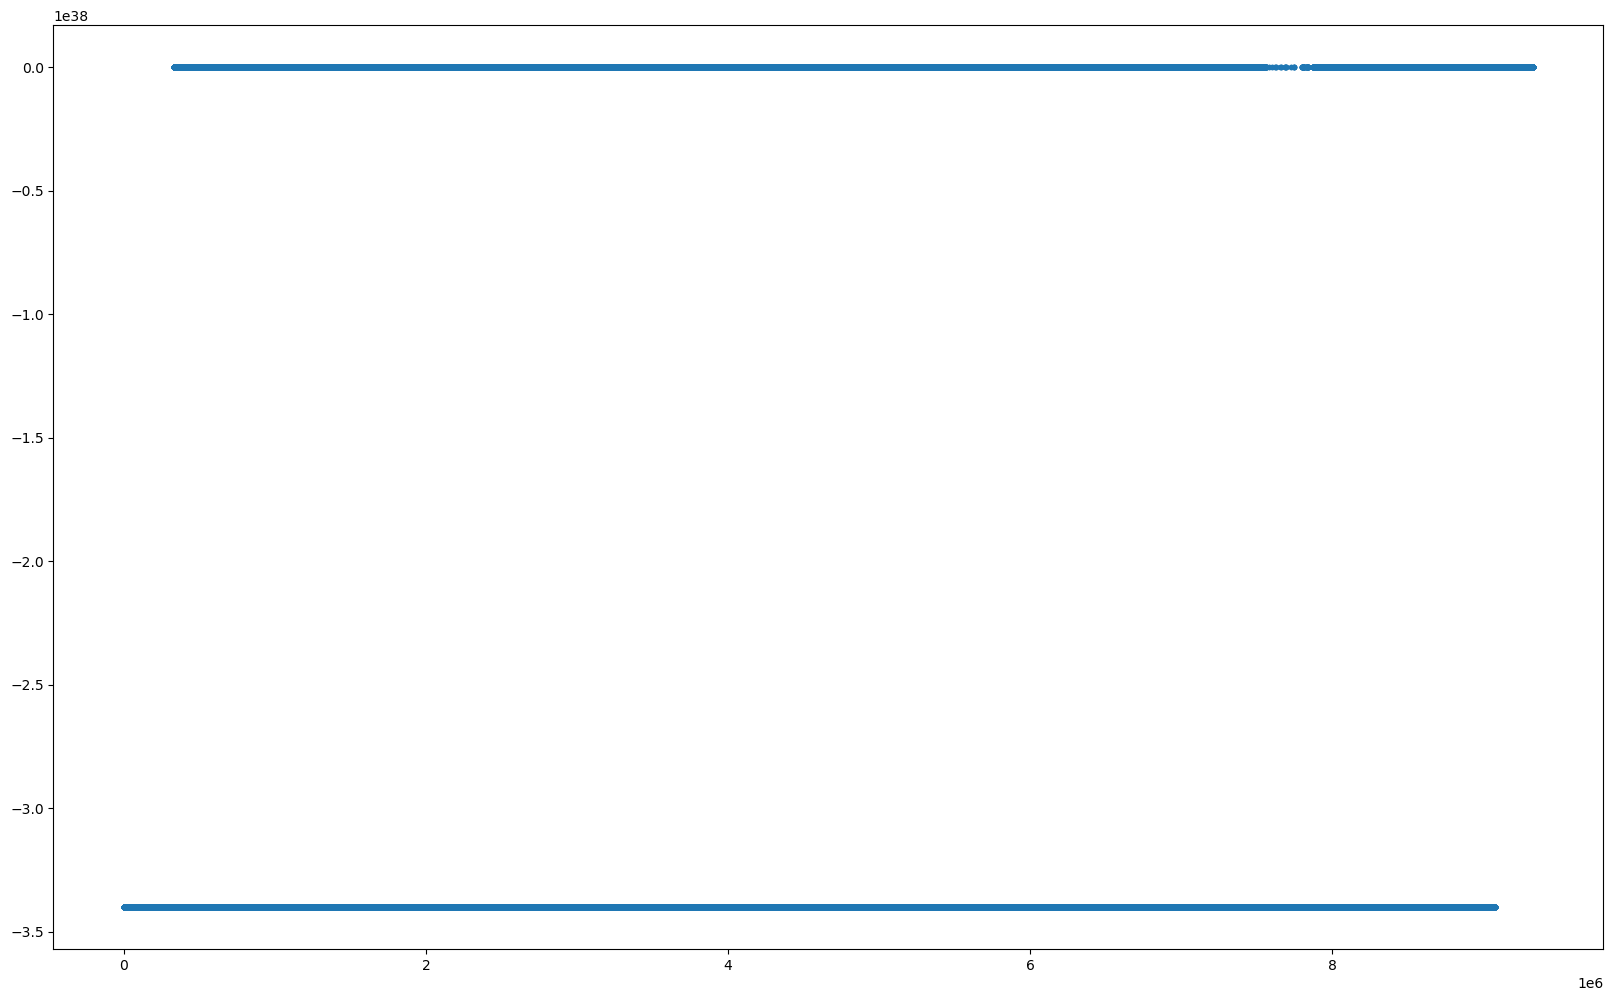

In [66]:
plt.figure(figsize=(20,12))
plt.plot(data1s.flatten(),linestyle='none',marker='.')

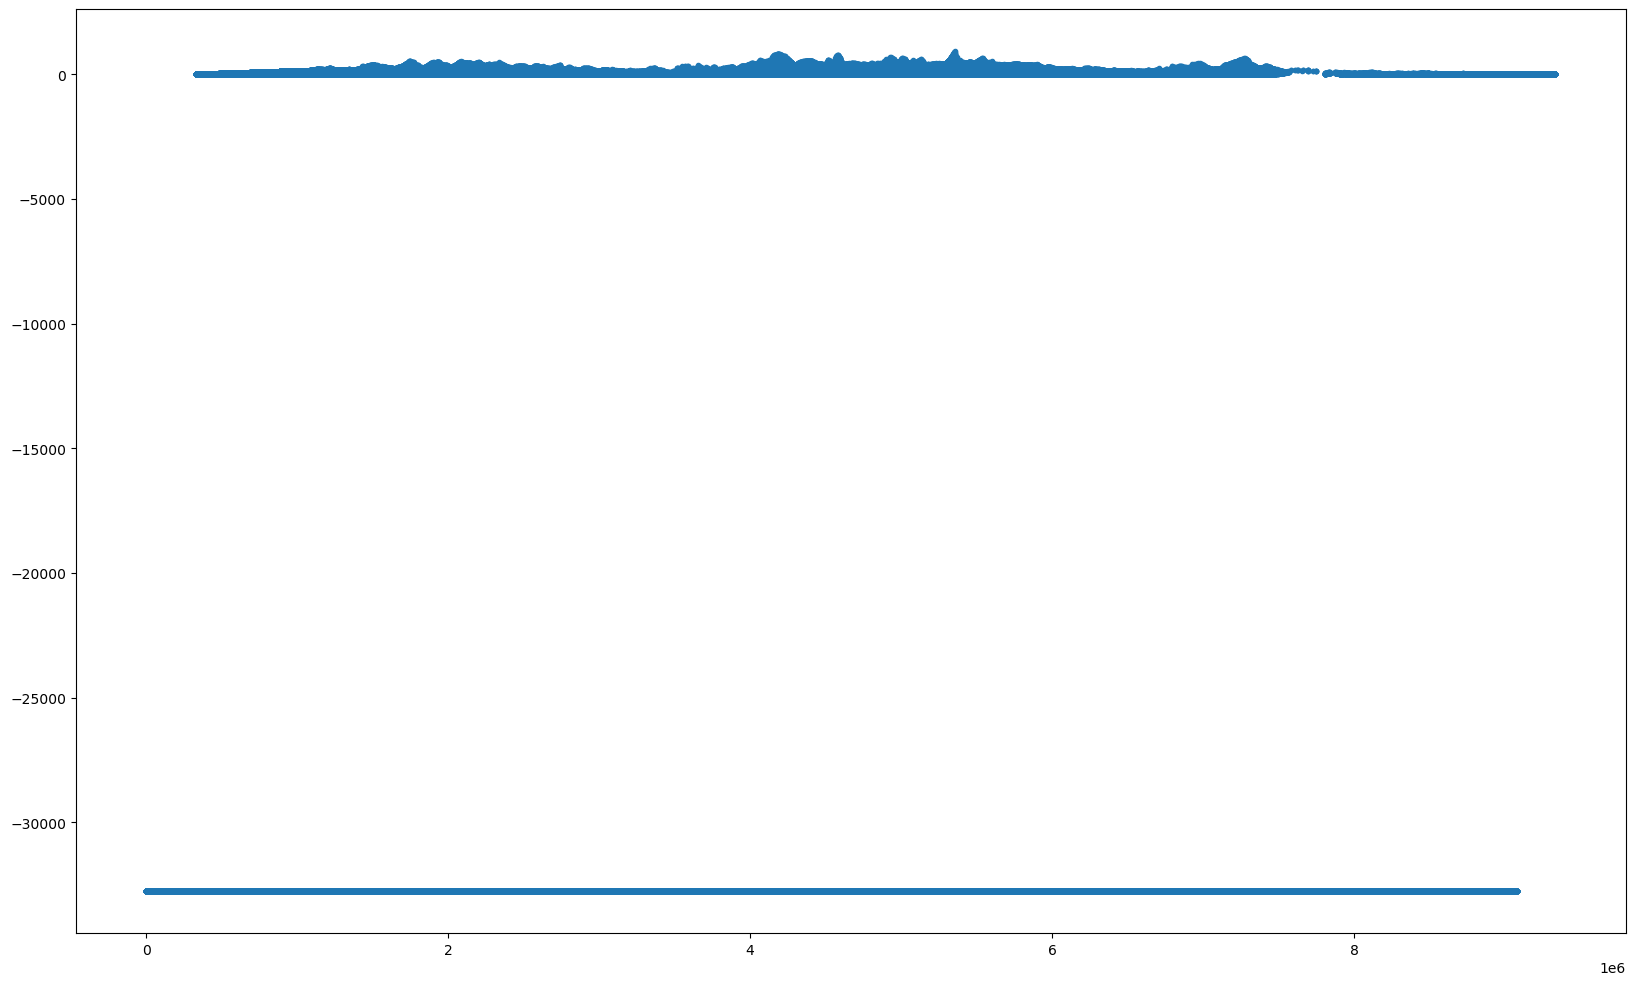

In [67]:
data2a
plt.figure(figsize=(20,12))
plt.plot(data2a.flatten(),linestyle='none',marker='.')

In [68]:
data2a.flatten().max()

936

In [69]:
data2a.flatten().min()

-32768

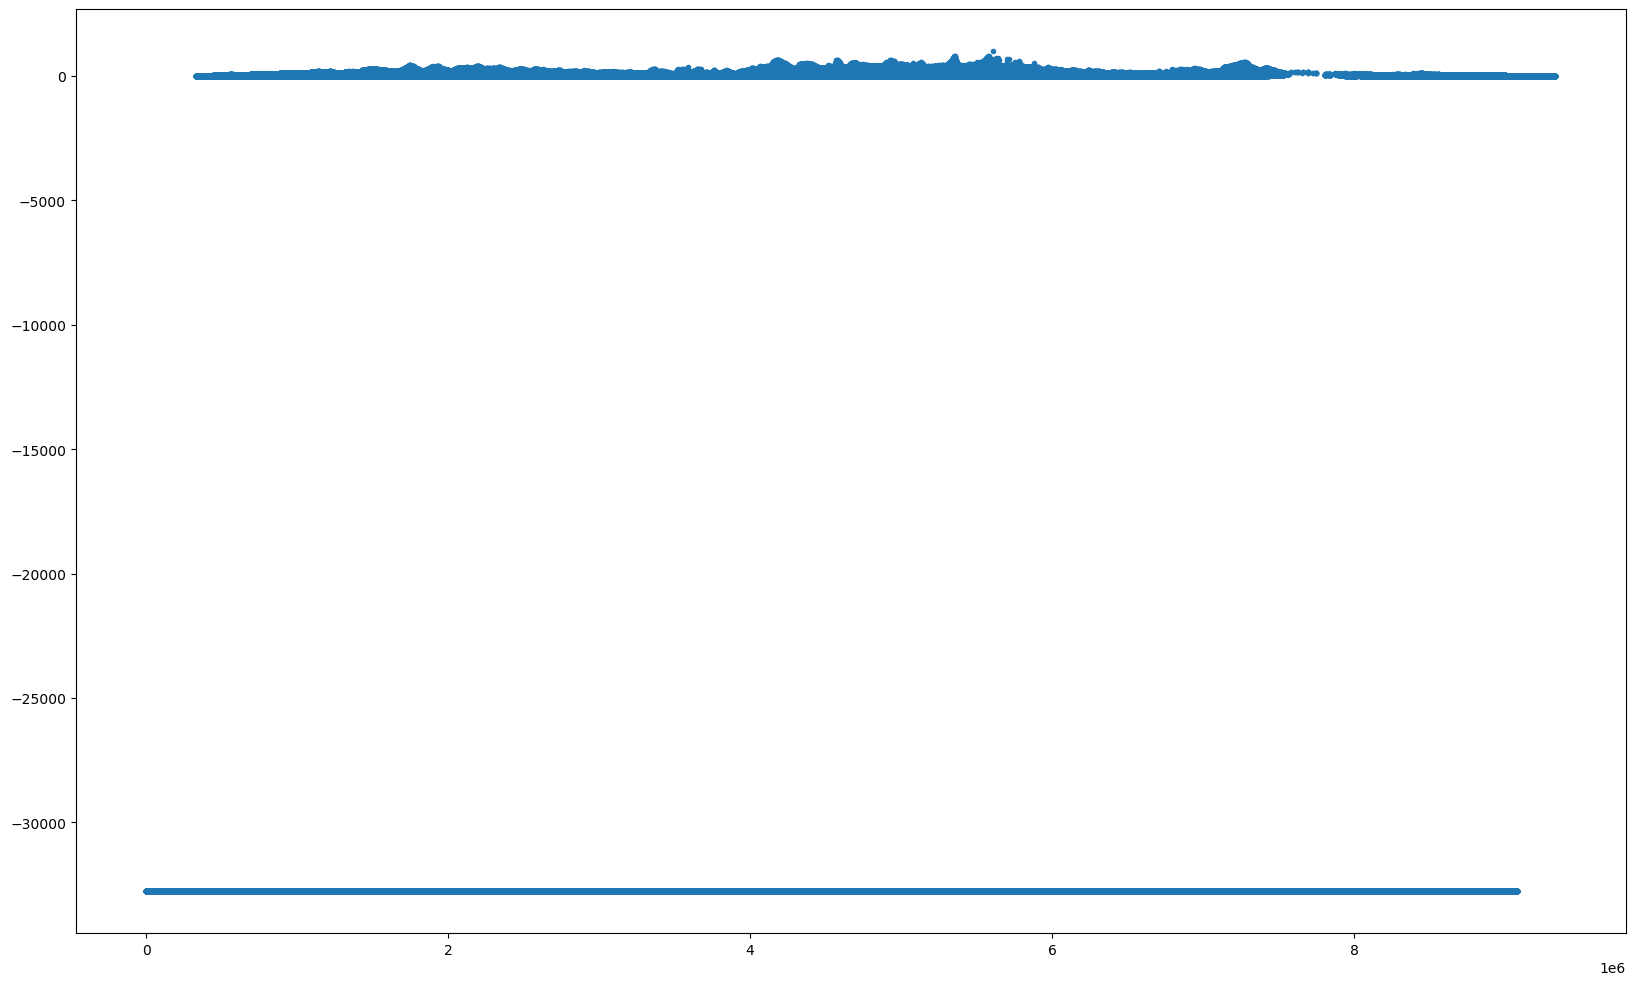

In [70]:
plt.figure(figsize=(20,12))
plt.plot(data2b.flatten(),linestyle='none',marker='.')

In [71]:
data2b.flatten().max()

1005

In [72]:
data2b.flatten().min()

-32768

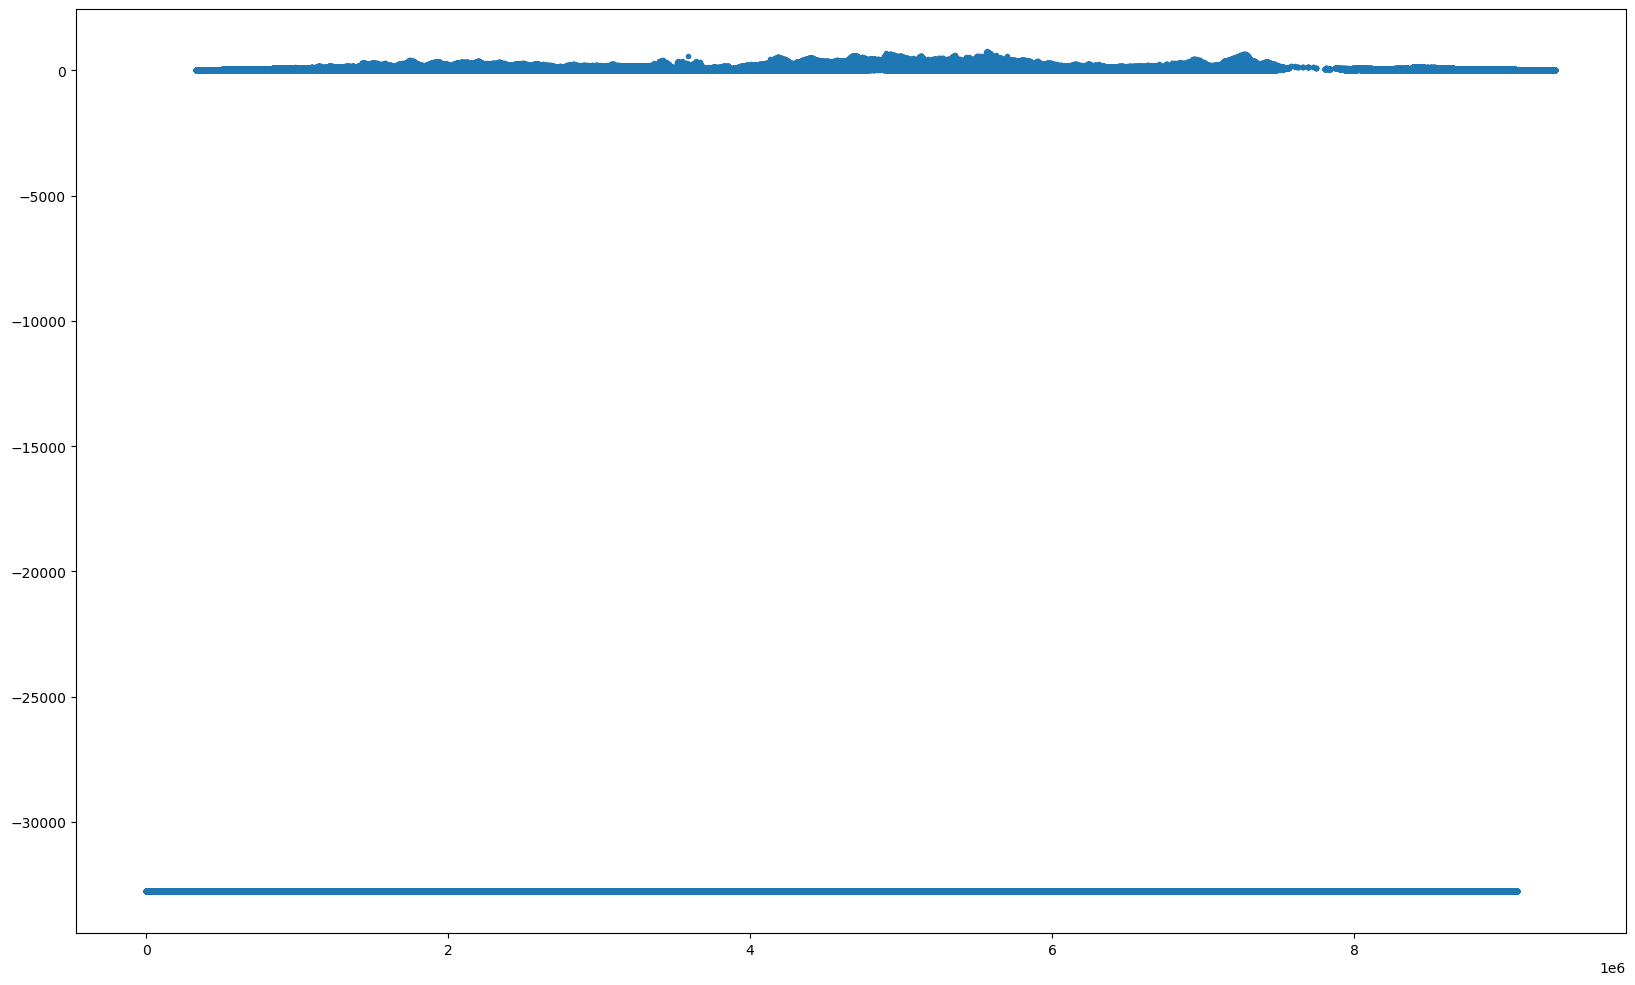

In [73]:
plt.figure(figsize=(20,12))
plt.plot(data2c.flatten(),linestyle='none',marker='.')

In [74]:
data2c.flatten().max()

774

In [75]:
data2c.flatten().min()

-32768

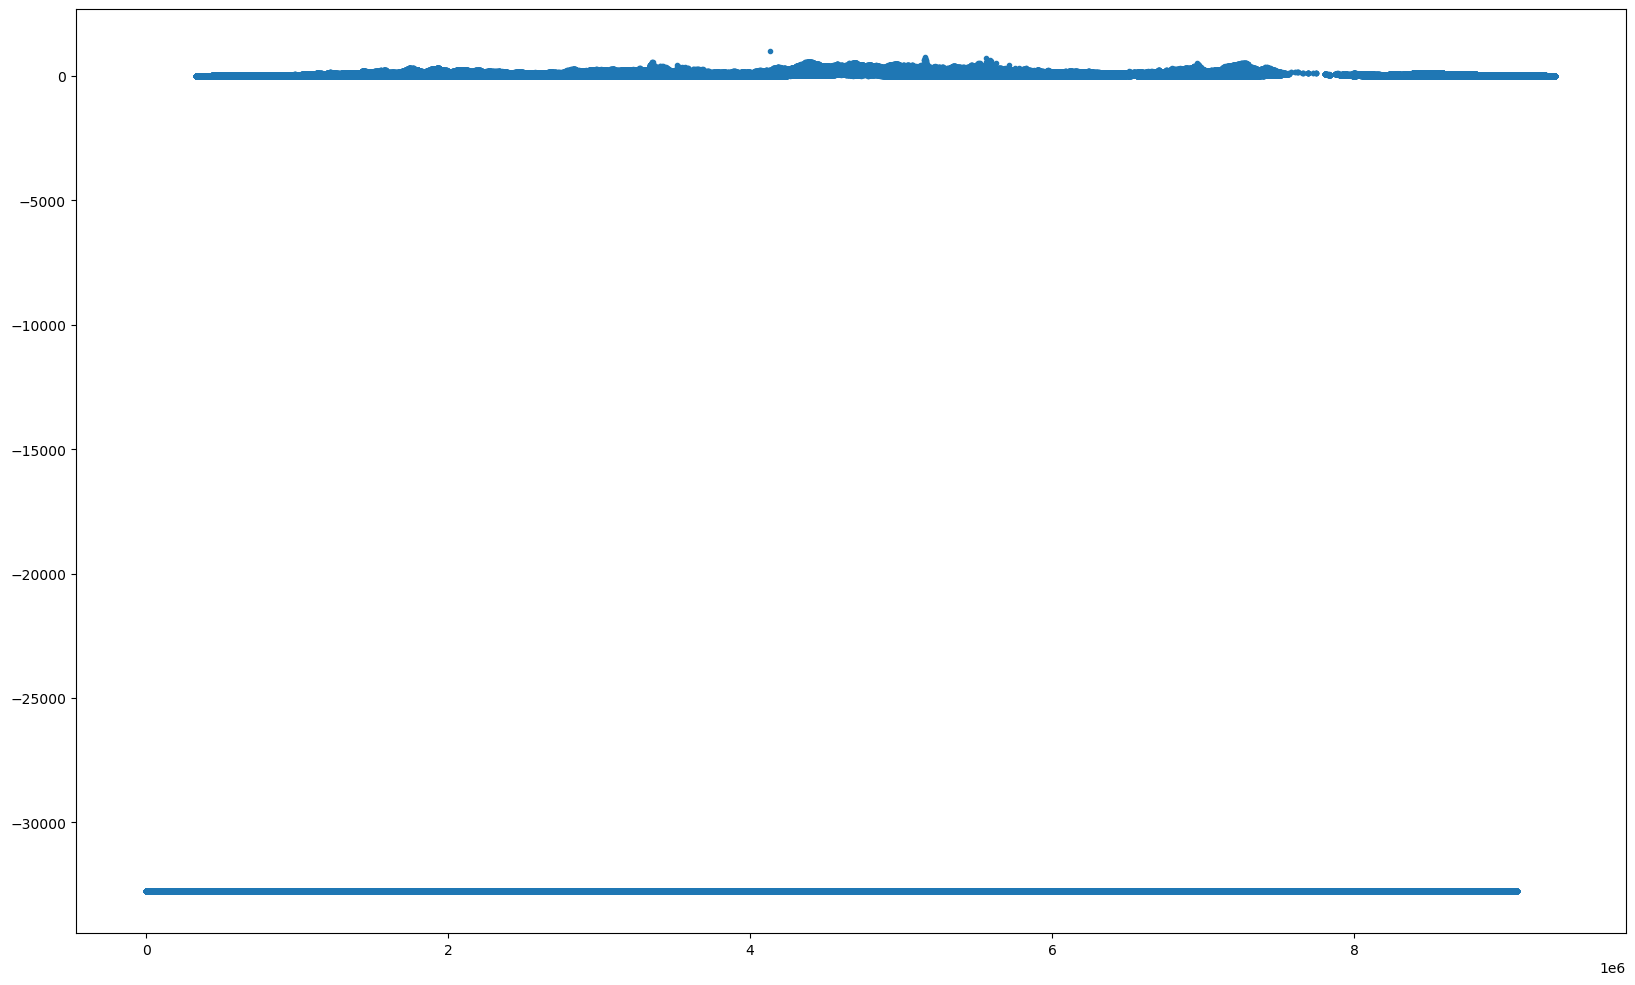

In [76]:
plt.figure(figsize=(20,12))
plt.plot(data2d.flatten(),linestyle='none',marker='.')

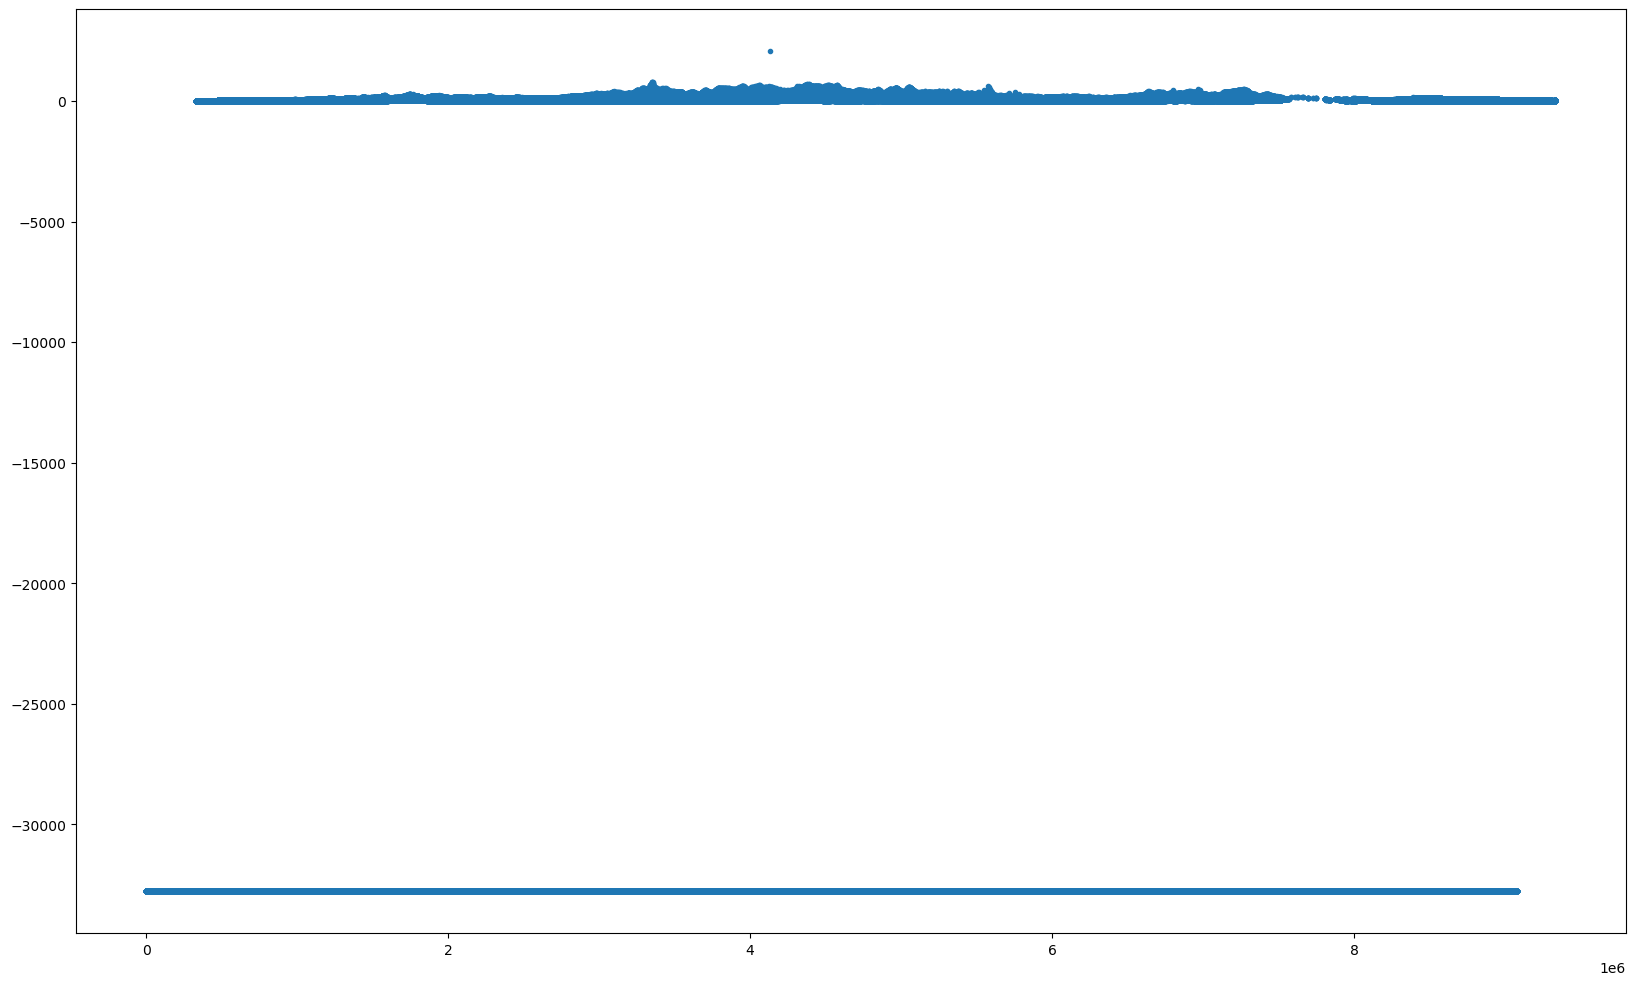

In [77]:
plt.figure(figsize=(20,12))
plt.plot(data2e.flatten(),linestyle='none',marker='.')

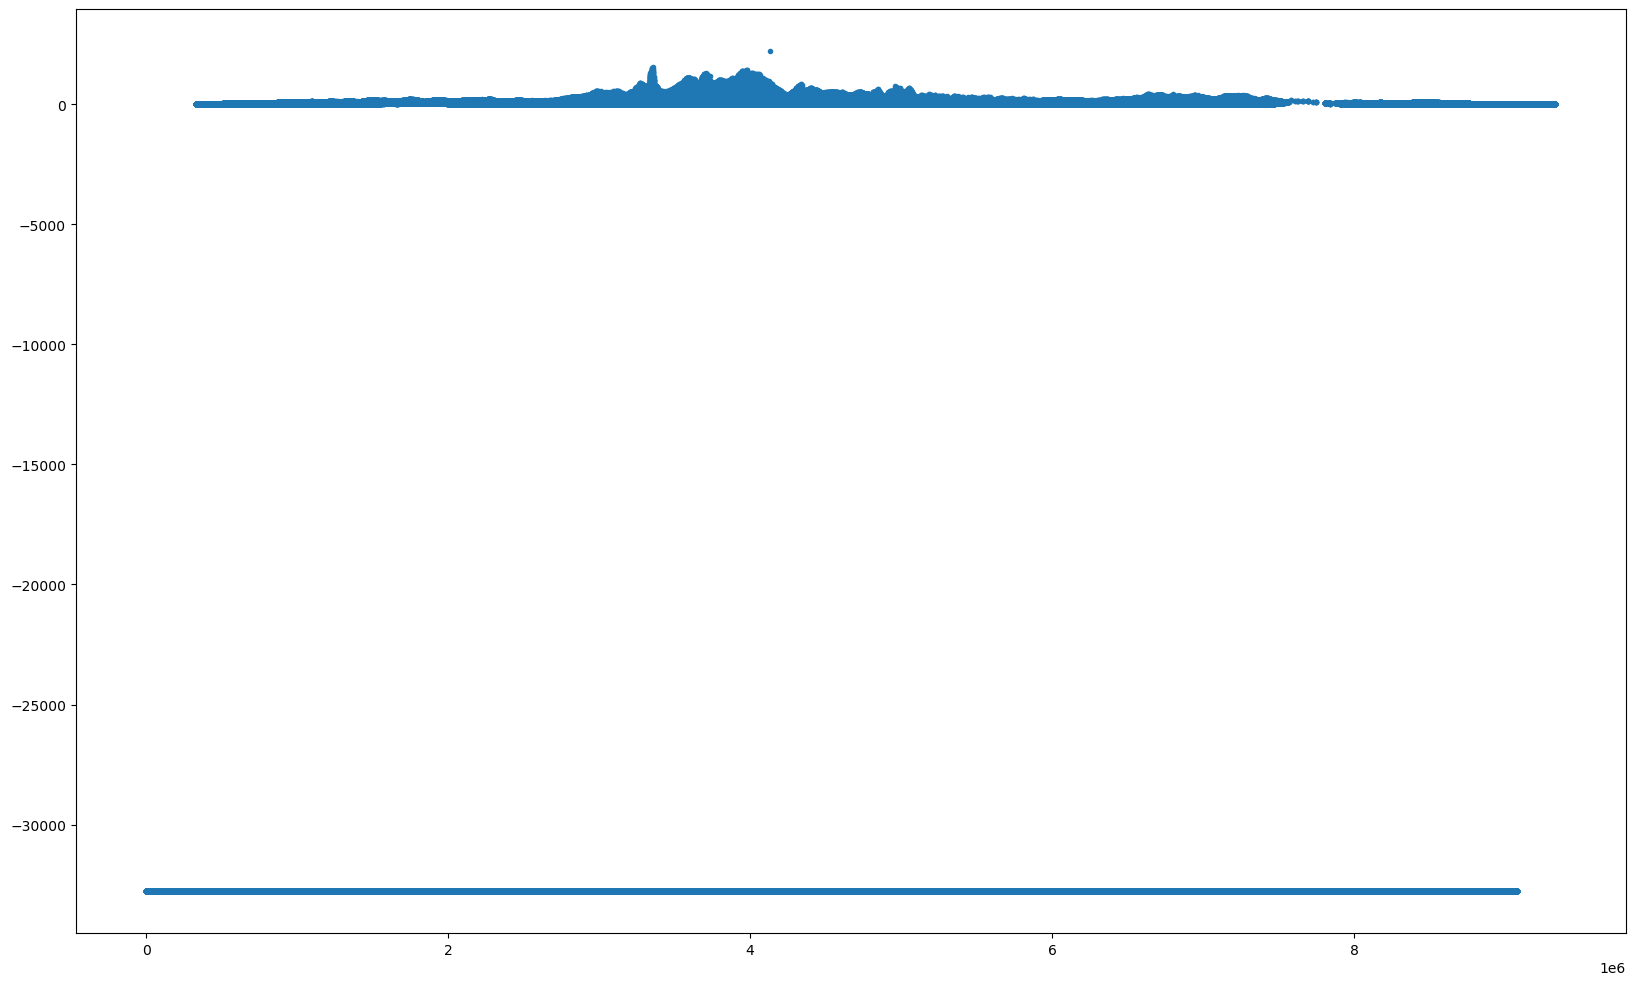

In [78]:
plt.figure(figsize=(20,12))
plt.plot(data2f.flatten(),linestyle='none',marker='.')

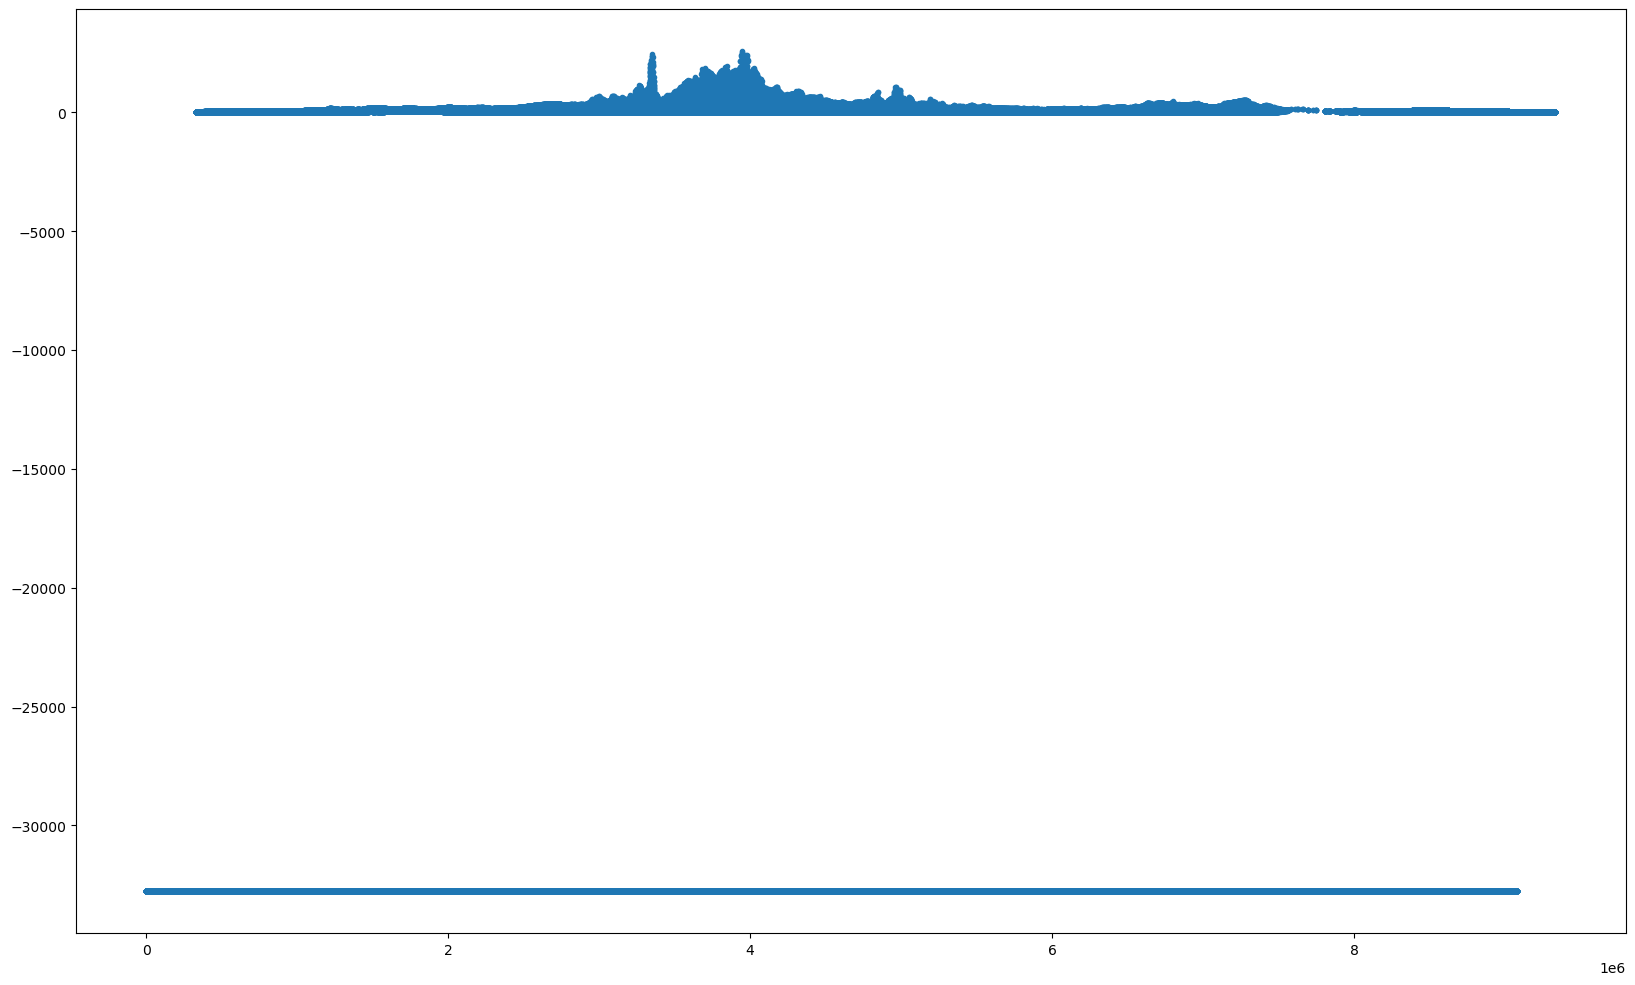

In [79]:
plt.figure(figsize=(20,12))
plt.plot(data2g.flatten(),linestyle='none',marker='.')

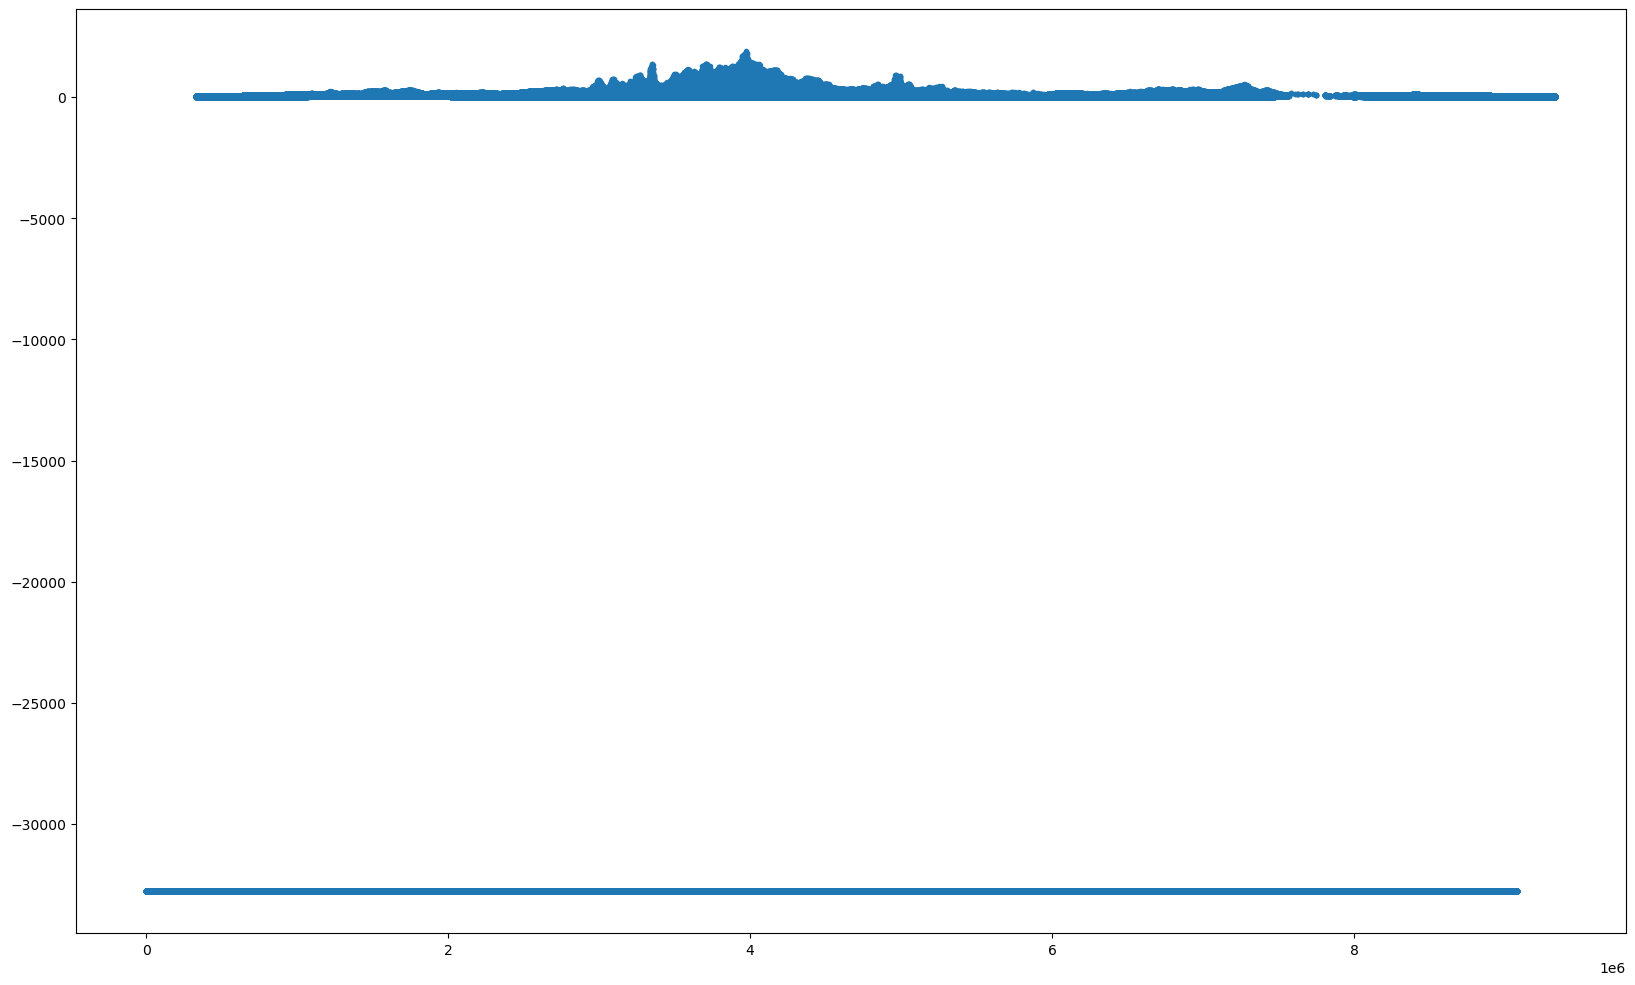

In [80]:
plt.figure(figsize=(20,12))
plt.plot(data2h.flatten(),linestyle='none',marker='.')

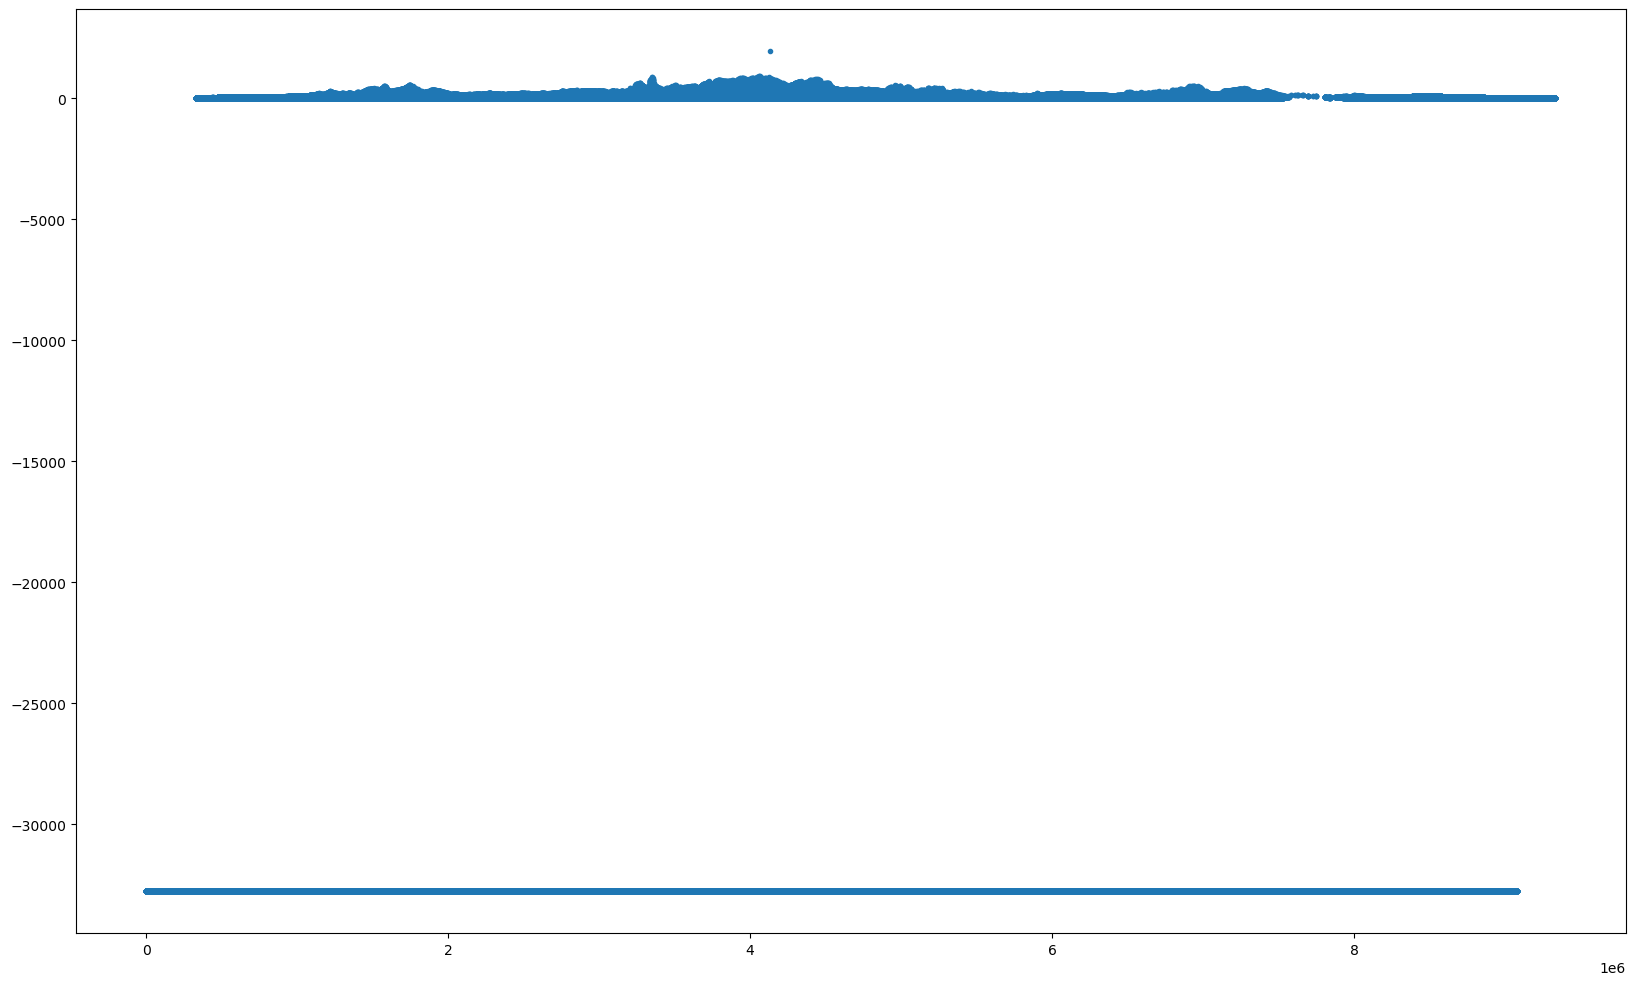

In [81]:
plt.figure(figsize=(20,12))
plt.plot(data2i.flatten(),linestyle='none',marker='.')

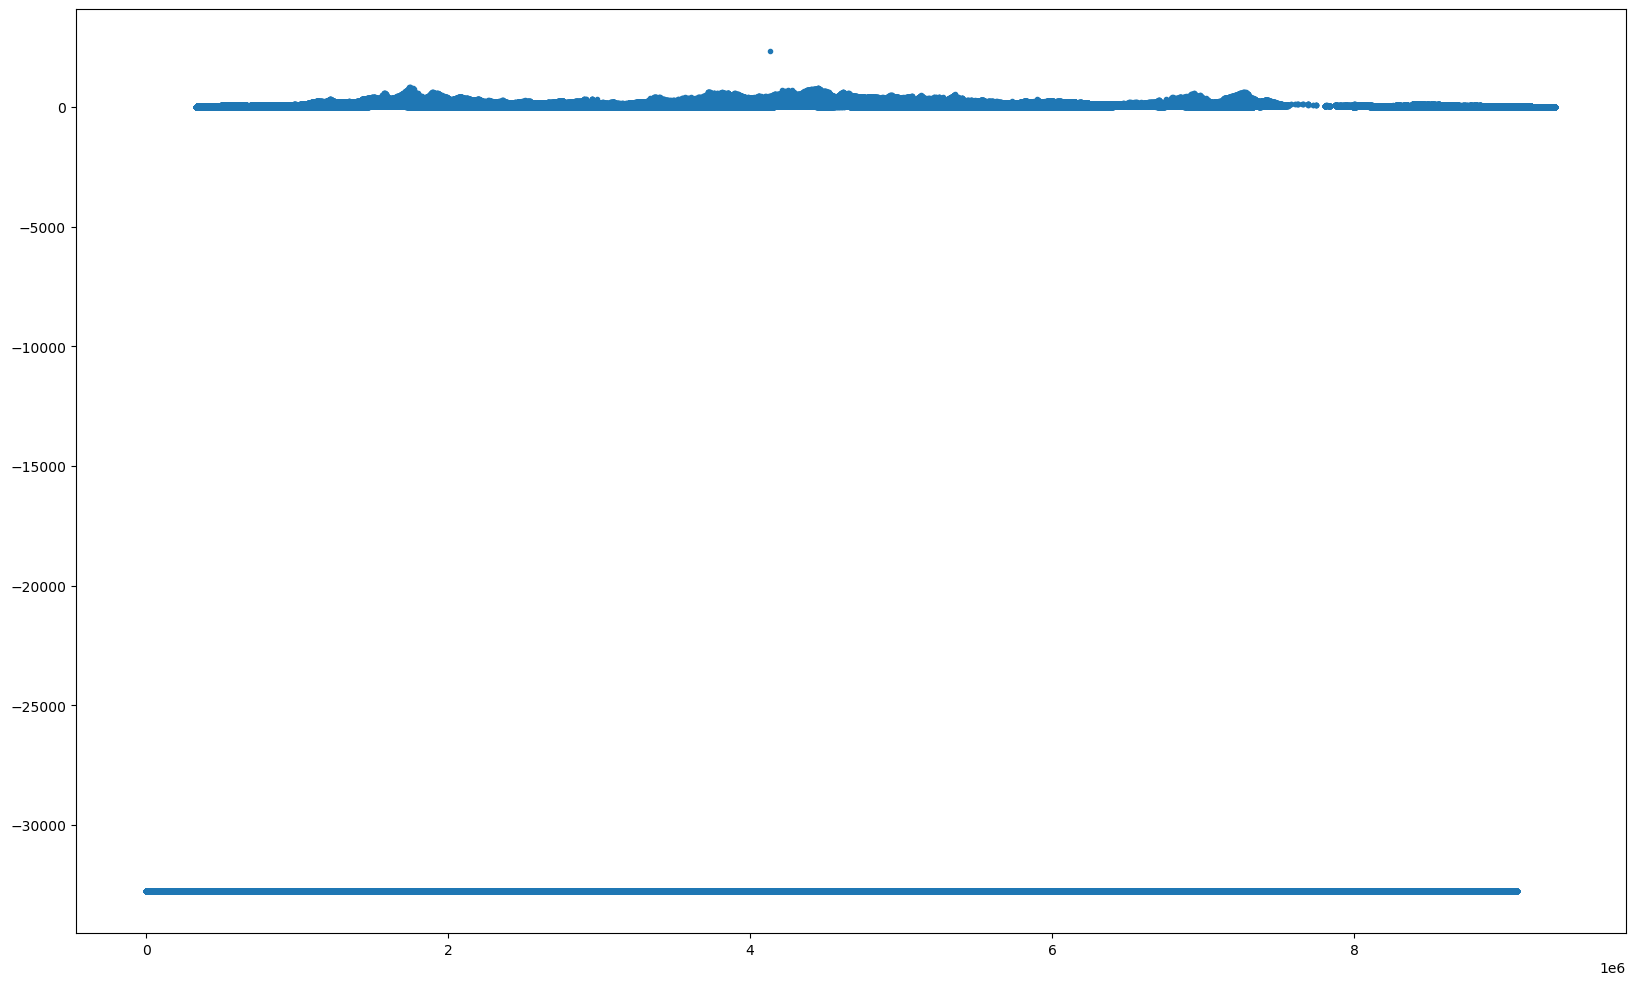

In [82]:
plt.figure(figsize=(20,12))
plt.plot(data2j.flatten(),linestyle='none',marker='.')

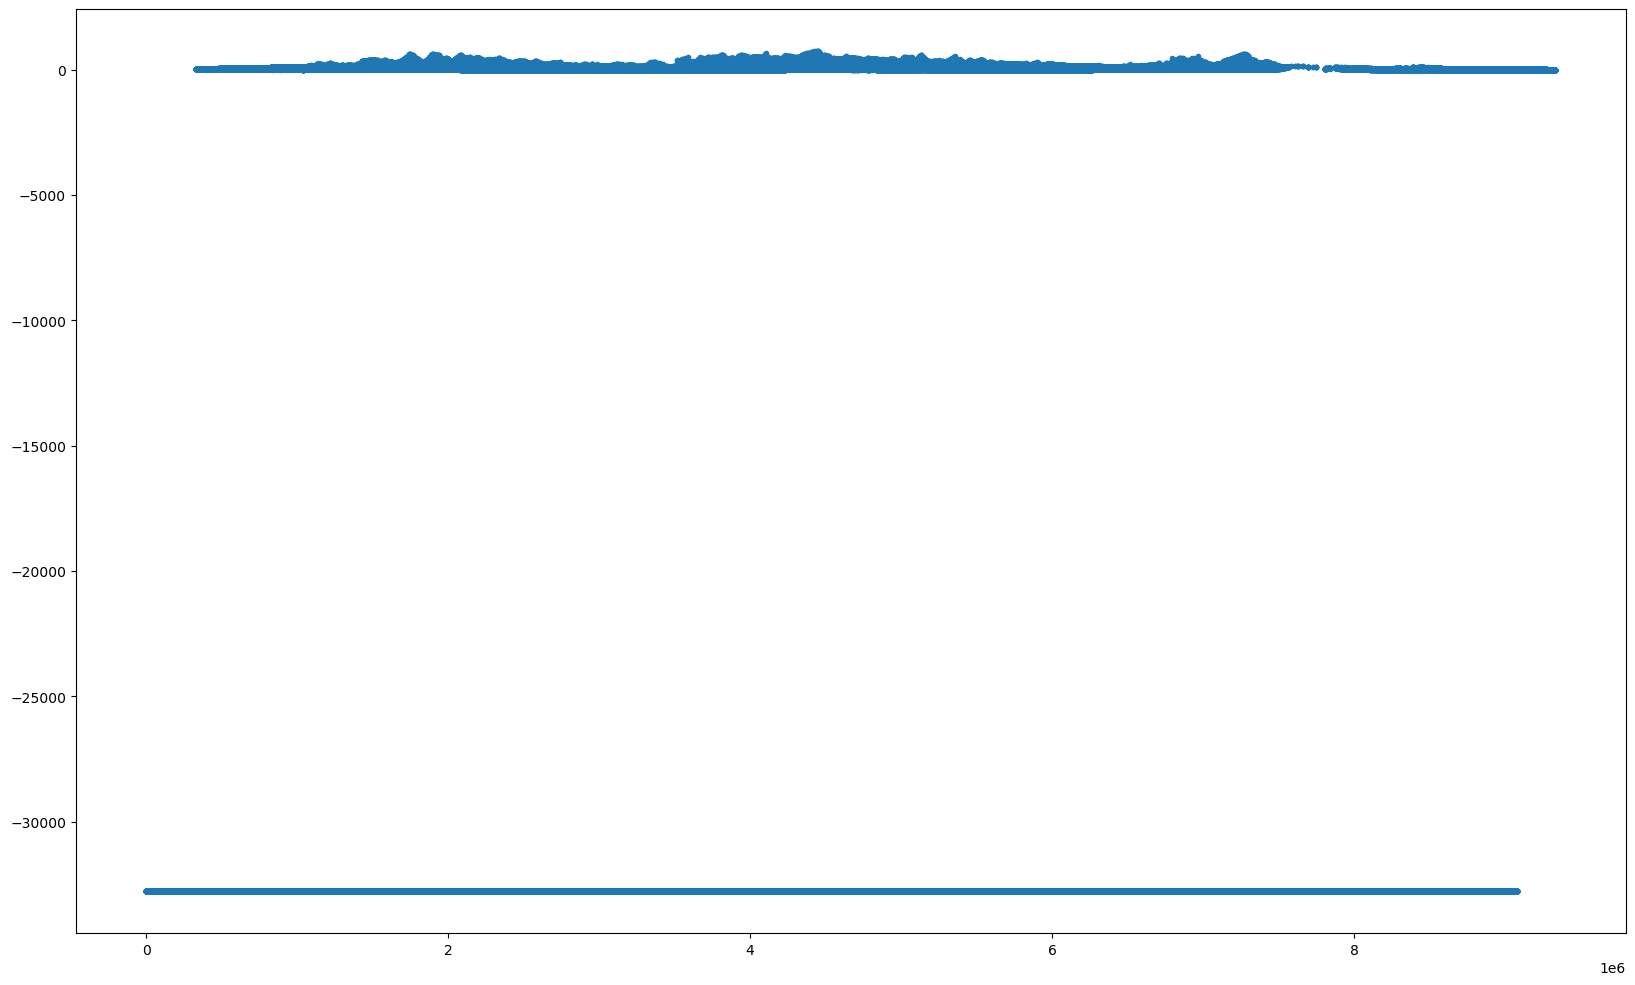

In [83]:
plt.figure(figsize=(20,12))
plt.plot(data2k.flatten(),linestyle='none',marker='.')

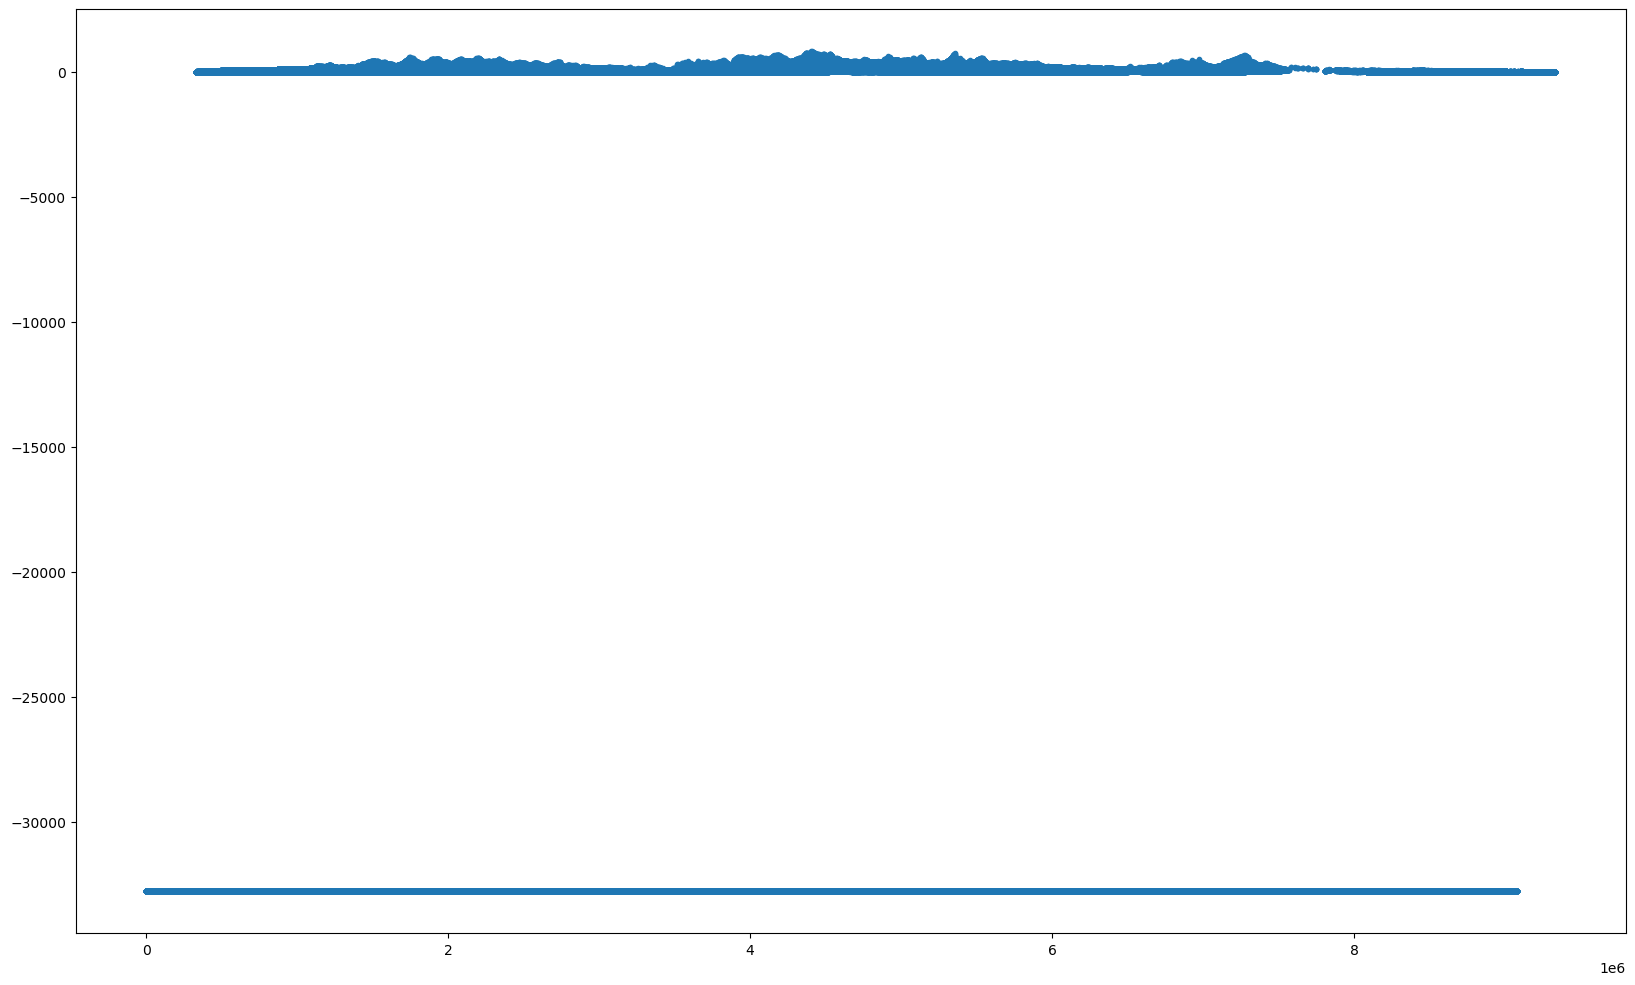

In [84]:
plt.figure(figsize=(20,12))
plt.plot(data2l.flatten(),linestyle='none',marker='.')

In [ ]:
data3a
plt.figure(figsize=(20,12))
plt.plot(data3a.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data3b.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data3c.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data3d.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data3e.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data3f.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data3g.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data3h.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data3i.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data3j.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data3k.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data3l.flatten(),linestyle='none',marker='.')

In [ ]:
(np.reshape(data3a,-1)).max()

In [ ]:
(np.reshape(data3a,-1)).min()

In [ ]:
data4a
plt.figure(figsize=(20,12))
plt.plot(data4a.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data4b.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data4c.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data4d.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data4e.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data4f.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data4g.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data4h.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data4i.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data4j.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data4k.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data4l.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data5a.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data5b.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data5c.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data5d.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data5e.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data5f.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data5g.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data5h.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data5i.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data5j.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data5k.flatten(),linestyle='none',marker='.')

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(data5l.flatten(),linestyle='none',marker='.')

In [ ]:
from sklearn.cluster import DBSCAN

In [2]:
data1a

NameError: name 'data1a' is not defined